In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-predictions-personal/Churn_Predictions.csv


**<center> <span style="color:#0F52BA;font-family:serif; font-size:34px;"> CUSTOMER CHURN PREDICTION 📈</span> </center>**

# <span style="font-family:serif; font-size:28px;"> Content</span>

1. [Introduction](#1)
    * [What is Customer Churn?](#2)
    * [How can customer churn be reducded?](#3)
    * [Objectives](#4)
2. [Loading libraries and data](#5)
3. [Undertanding the data](#6)
4. [Exploratory Data Analysis](#7)
5. [Data Preprocessing](#8)
6. [Machine Learning Model Evaluations and Predictions](#9)
   * [Random Forest with Imbalanced Data](#101)
   * [XGB Classifier with Imbalanced Data](#102)
   * [LGBM Classifier with Imbalanced Data](#103)
   * [CatBoost Classifier with Imbalanced Data](#104)
   * [Balancing Data using SMOTE + Tomek Links](#105)
   * [Random Forest with Balanced Data](#106)
   * [XGB Classifier with Balanced Data](#107)
   * [LGBM Classifier with Balanced Data](#108)
   * [CatBoost Classifier with Balanced Data](#109)
   * [XGB Classifier Optuna](#110)
   * [LGBM Classifier Optuna](#111)
   * [Shap Explainer](#112)
   * [Feature Importance](#113)
   * [Feature Selection](#114)
   * [LGBM Classifier Optuna with Eliminated Data](#115)
   * [Table with models scores](#116)
   * [Lime with best XGB Classifier](#117)
7. [Conclusion](#10)
8. [Addition. Unsupervised Learning. Customer Segmentation](#11)
   * [Agglomerative Clustering](#212)
   * [Spectral Clustering](#213)
   * [KMeans Clustering](#214)
   * [Best XGB using Clusters](#215)





<a id = "1" ></a>
# <span style="font-family:serif; font-size:28px;"> 1. Introduction</span>
<a id = "introduction" ></a>

<a id = "2" ></a>
#### <b>What is Customer Churn?</b>
<span style="font-size:16px;">  Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service. </span>

<span style="font-size:16px;"> Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more
customers loyalty. The core to succeed in this market lies in the customer itself. 
</span>

<span style="font-size:16px;"> Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.</span>

<a id="churn"></a>
<a id = "3" ></a>

<span style="font-size:16px;"><b>To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.</b></span> 

<span style="font-size:16px;"> To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few. </span> 

<span style="font-size:16px;">As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy. </span> 
<a id="reduce"></a>

<a id = "4" ></a>
#### <b> Objectives</b>
I will explore the data and try to answer some questions like:
* What's the % of Churn Customers and customers that keep in with the active services?
* Is there any patterns in Churn Customers based on the gender?
* Is there any patterns/preference in Churn Customers based on the type of service provided?
* What's the most profitable service types?
* Which features and services are most profitable?
* Many more questions that will arise during the analysis
<a id="objective"></a>

<a id = "5" ></a>
# <span style="font-family:serif; font-size:28px;"> 2. Loading libraries and data</span>
<a id="loading"></a>

In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns



from sklearn import tree
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
#from sklearn.metrics precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, mean_absolute_error, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import accuracy_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('default')

In [3]:
#read dataset
data=pd.read_csv('/kaggle/input/churn-predictions-personal/Churn_Predictions.csv')

<a id = "6" ></a>
# <span style="font-family:serif; font-size:28px;"> 3. Understanding the data</span>
<a id = "Undertanding the data" ></a>

In [4]:
#check the table
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#check shape of the dataset
data.shape

(10000, 14)

In [6]:
#check some statistics
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
#check some info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
#check fo null values
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Inference: As we see there is no need to fill columns, because there is no missing data in dataset

<a id = "7" ></a>
# <span style="font-family:serif; font-size:28px;"> 4. Exploratory Data Analysis </span>
<a id = "missingvalue" ></a>

<AxesSubplot:xlabel='Exited', ylabel='count'>

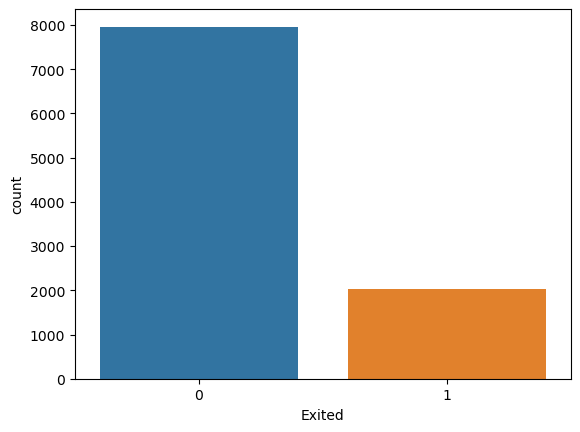

In [9]:
sns.countplot(x=data['Exited'])

Inference: dataset is imbalanced and before prediction need to use some techniques to balance it.


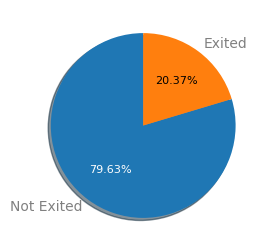

In [10]:
values = data['Exited'].value_counts()
labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(figsize = (4, 3))

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

Inference:
20% of customers are exited, while 80% are not.

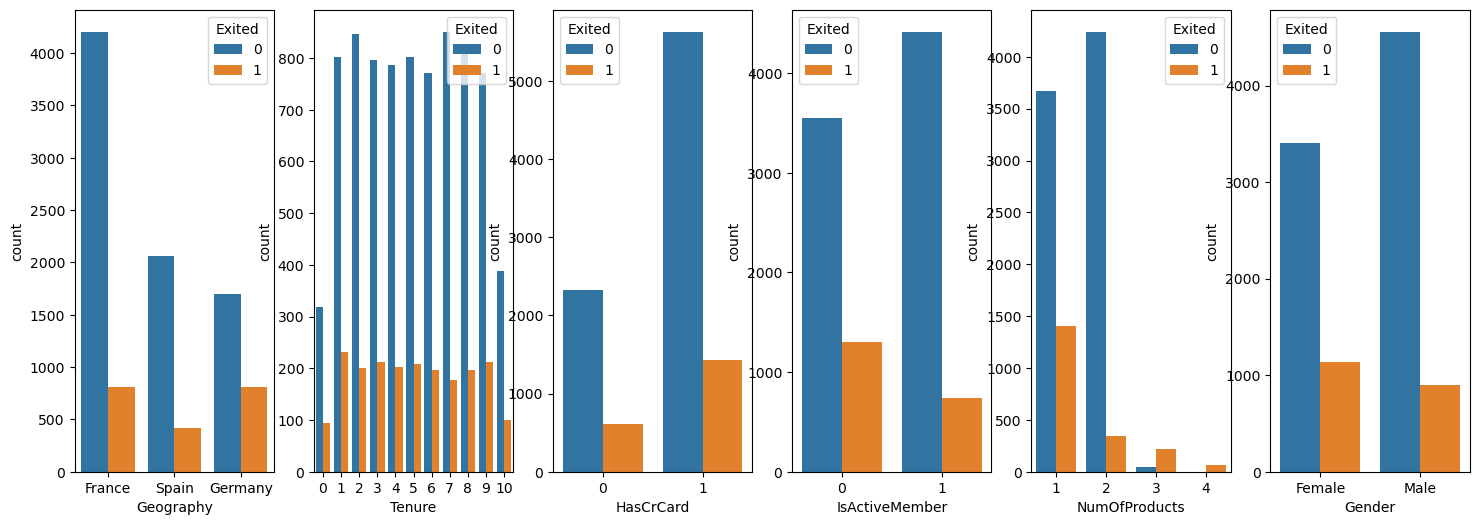

In [11]:
#visualizing categorical data
_, ax = plt.subplots(1, 6, figsize=(18, 6))
plt.subplots_adjust(wspace=0.2)
list_data_cat=['Geography','Tenure', 'HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Gender']
for i in range(6):
    sns.countplot(x=data[list_data_cat[i]], hue=data['Exited'], ax=ax[i])


Inference: 
* Most customers are from France.  Also France and Germany have highest number of customers who churned. Spain has lowest number of customers who churned. 
* Customers with 0 or 10 years of tenure have lowest chances to churn. Most of customers have tenure between 1 to 9 years.
* Most customers have a credit card and are more likely to churn than those without credit cards.
* Most customers are active membres and they are less likely to churn than inactive customers.
* Customers whith 3 or 4 products have highest chances to churn. majority customers have 1 or 2 products.
* Most customers are male and they have less chances to churn.

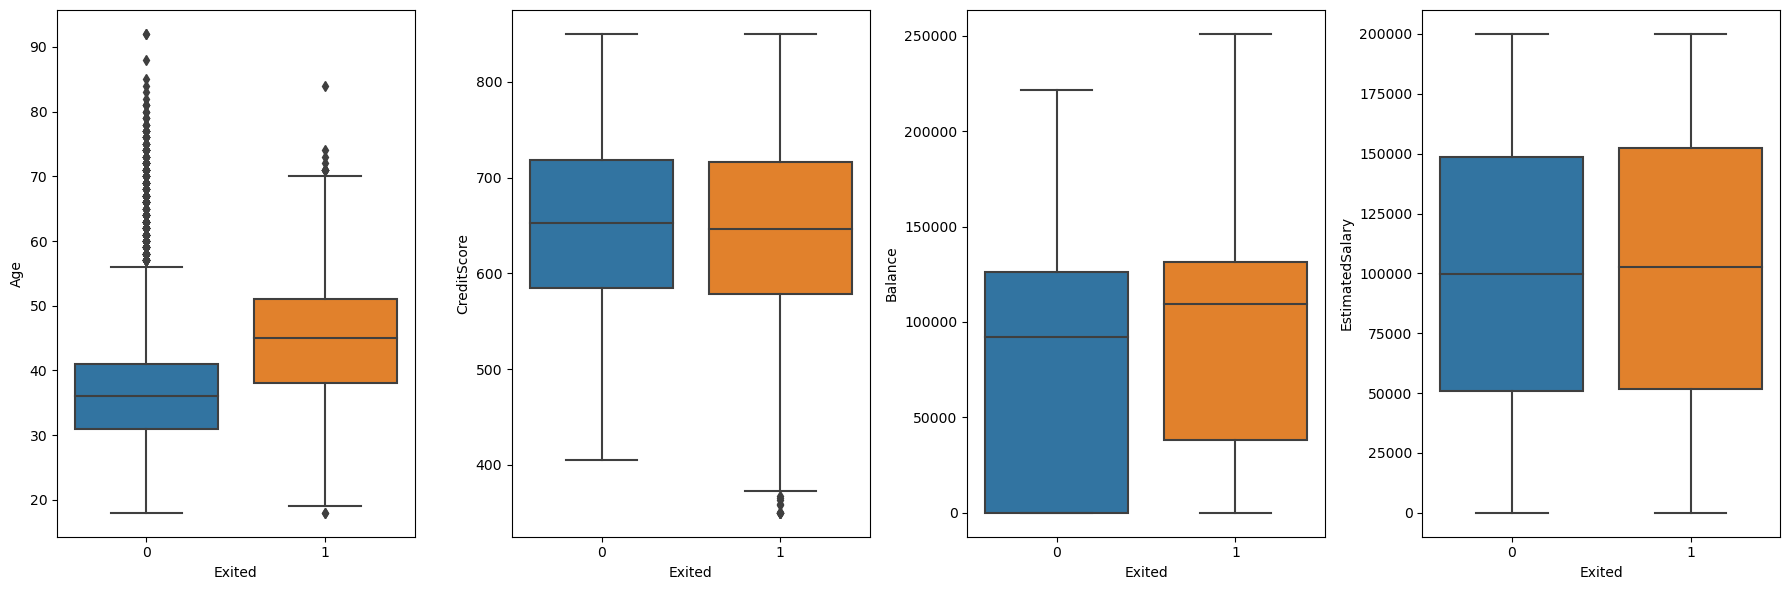

In [12]:
#visualizing numerical data
fig, ax = plt.subplots(1, 4, figsize = (18, 6))
plt.subplots_adjust(wspace=0.2)
list_data_num=['Age','CreditScore', 'Balance', 'EstimatedSalary']
for i in range(4):
    sns.boxplot(x=data['Exited'], y=data[list_data_num[i]], ax=ax[i])
plt.tight_layout()
plt.show()

Inference:
* The older customers are more likely to churn
* Bank loses most customers with credit score over 500
* Bank loses most customers with  balance over 40000 and some  churned customers even have highest balance
* Estimated salary is not significant to the likelihood of churn.

In [13]:

#check distribution by age
#_, ax = plt.subplots(1, 3, figsize=(18, 6))
#plt.subplots_adjust(wspace=0.3)
#list_data_check1=['NumOfProducts','HasCrCard', 'IsActiveMember']
#for i in range(3):
    #sns.swarmplot(x=data[list_data_check1[i]], y=data['Age'], ax=ax[i])




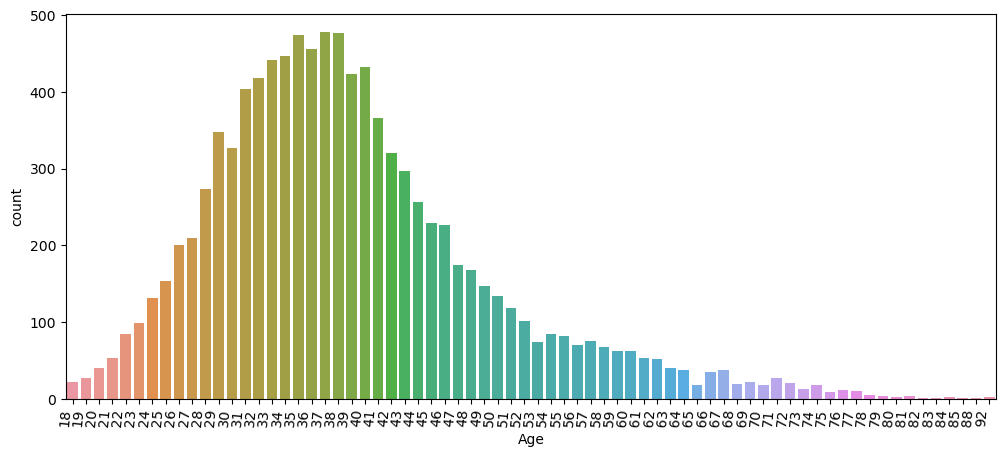

In [14]:
plt.figure(figsize=(12,5))
ch=sns.countplot(x=data['Age'])
ch.set_xticklabels(ch.get_xticklabels(), rotation=85, horizontalalignment='right')
None #don't show the label objects

Inference:
* We see that age distribution is right-skewed
* Most customers in age between 29 and 45 years

<AxesSubplot:xlabel='Age', ylabel='Balance'>

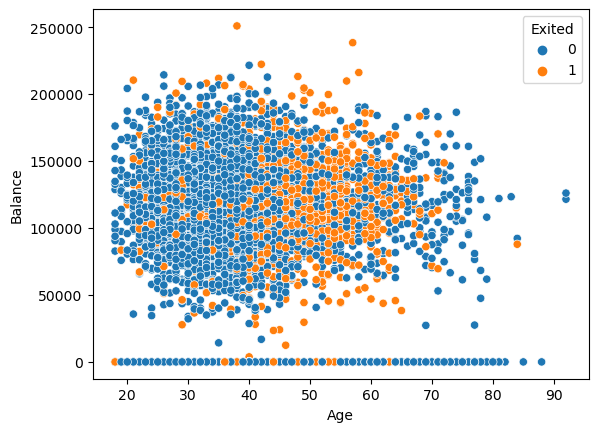

In [15]:
sns.scatterplot(x=data['Age'], y=data['Balance'], hue=data['Exited'])

Inference:
* Most churned customers are in age between 40 and 70 with balance more than 40000

<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

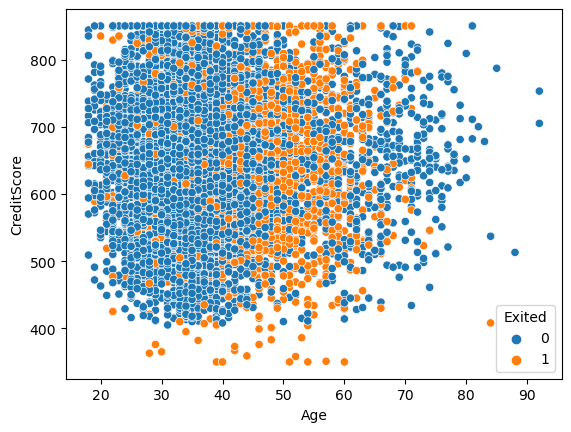

In [16]:
sns.scatterplot(x=data['Age'], y=data['CreditScore'], hue=data['Exited'])

Inference:
* Most churned customers are in age between 40 and 70 with credit score 500

<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

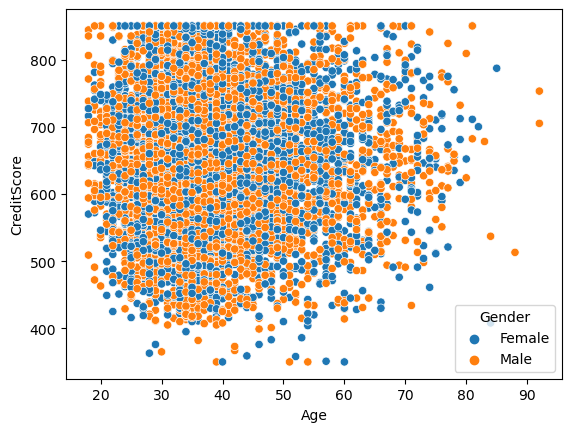

In [17]:
sns.scatterplot(x=data['Age'], y=data['CreditScore'], hue=data['Gender'])

Inference:
* We see  more males in age from 20 to 48

<AxesSubplot:xlabel='Gender', ylabel='count'>

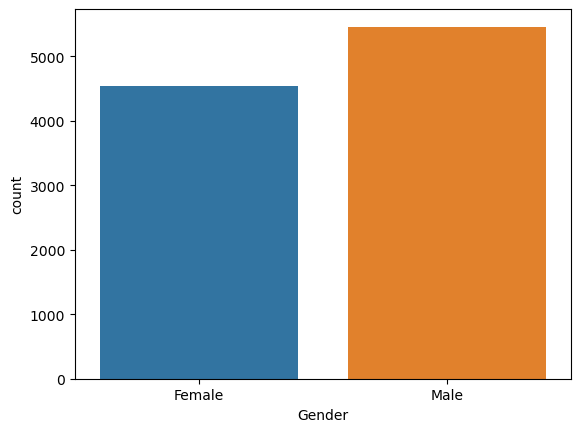

In [18]:
sns.countplot(x=data['Gender'])

Inference:
* Gender column is slightly imbalanced

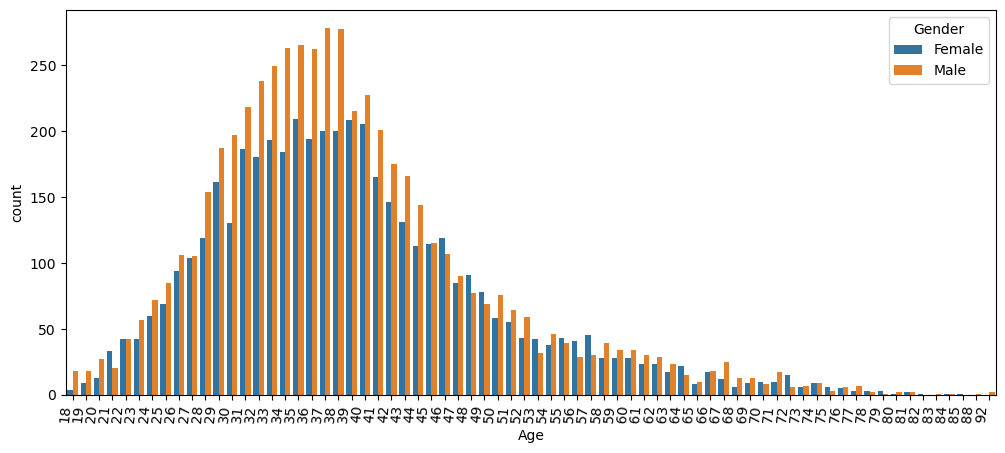

In [19]:
plt.figure(figsize=(12,5))
ch=sns.countplot(x=data['Age'], hue=data['Gender'])
ch.set_xticklabels(ch.get_xticklabels(), rotation=85, horizontalalignment='right')
None #don't show the label objects

Inference:
* Majority customers in age from 29 to 45 are males.
* We see almost equal number of male and female customers in age between (23 and 28) and older than 46 years.

In [20]:
#create age groups
data['AgeGroup'] = pd.cut(data['Age'], bins=[0,18,28,45,53, 92], right=True)



In [21]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'AgeGroup'],
      dtype='object')

In [22]:
data['AgeGroup'].unique()

[(28, 45], (45, 53], (18, 28], (53, 92], (0, 18]]
Categories (5, interval[int64, right]): [(0, 18] < (18, 28] < (28, 45] < (45, 53] < (53, 92]]

In [23]:
#grouping 
data.groupby(['Gender','AgeGroup','Exited']).agg({'Balance':['min', 'max', 'mean']})

Balance                          
                             min        max           mean
Gender AgeGroup Exited                                    
Female (0, 18]  0       82767.42  128743.80  101055.577500
                1            NaN        NaN            NaN
       (18, 28] 0           0.00  186788.96   70814.331233
                1           0.00  191864.51   95684.729310
       (28, 45] 0           0.00  212778.20   71389.037320
                1           0.00  211774.31   88649.010147
       (45, 53] 0           0.00  185513.67   74360.239416
                1           0.00  213146.20   85860.776497
       (53, 92] 0           0.00  190353.08   66121.974527
                1           0.00  238387.56   92761.875882
Male   (0, 18]  0           0.00  176139.50   83594.271250
                1           0.00       0.00       0.000000
       (18, 28] 0           0.00  214346.96   74332.623262
                1           0.00  210433.08  111226.274167
       (28, 45] 0           0.00  221532.80   73742.528836
                1           0.00  250898.09   95642.681393
       (45, 53] 0           0.00  191808.73   72809.360123
                1           0.00  202904.64   94565.260120
       (53, 92] 0           0.00  190298.89   75354.604364
                1           0.00  185966.64   85107.017733

In [24]:
#grouping 
data.groupby(['HasCrCard','AgeGroup','Exited']).agg({'Balance':['min', 'max', 'mean']})

Balance                          
                              min        max           mean
HasCrCard AgeGroup Exited                                  
0         (0, 18]  0          0.0  160980.03   91887.728571
                   1          0.0       0.00       0.000000
          (18, 28] 0          0.0  197041.80   72816.821182
                   1          0.0  210433.08  116940.279259
          (28, 45] 0          0.0  212778.20   73847.395909
                   1          0.0  250898.09   87564.823772
          (45, 53] 0          0.0  191808.73   75447.352229
                   1          0.0  204510.94   94014.391374
          (53, 92] 0          0.0  187911.55   79264.224691
                   1          0.0  238387.56   94090.802623
1         (0, 18]  0          0.0  176139.50   84501.273077
                   1          0.0       0.00       0.000000
          (18, 28] 0          0.0  214346.96   72732.434614
                   1          0.0  191864.51   95469.740746
          (28, 45] 0          0.0  221532.80   72289.256237
                   1          0.0  211774.31   93439.741835
          (45, 53] 0          0.0  190678.02   72714.587325
                   1          0.0  213146.20   87672.721518
          (53, 92] 0          0.0  190353.08   68354.877981
                   1          0.0  209767.31   87305.179705

In [25]:
#grouping 
data.groupby(['IsActiveMember','AgeGroup','Exited']).agg({'Balance':['min', 'max', 'mean']})

Balance                          
                                   min        max           mean
IsActiveMember AgeGroup Exited                                  
0              (0, 18]  0          0.0  176139.50   97569.565556
                        1          NaN        NaN            NaN
               (18, 28] 0          0.0  214346.96   70610.195727
                        1          0.0  191864.51  101081.634237
               (28, 45] 0          0.0  221532.80   72010.903813
                        1          0.0  222267.63   91420.427959
               (45, 53] 0          0.0  191808.73   74117.433734
                        1          0.0  213146.20   89725.973130
               (53, 92] 0          0.0  190353.08   78374.675625
                        1          0.0  187997.15   89339.294520
1              (0, 18]  0          0.0  151762.74   78509.505455
                        1          0.0       0.00       0.000000
               (18, 28] 0          0.0  197715.93   74732.801452
                        1          0.0  210433.08  102572.678571
               (28, 45] 0          0.0  212778.20   73434.618681
                        1          0.0  250898.09   92375.407727
               (45, 53] 0          0.0  190678.02   73078.885489
                        1          0.0  204510.94   89707.007635
               (53, 92] 0          0.0  190298.89   71028.964196
                        1          0.0  238387.56   89538.167762

<a id = "8" ></a>
# <span style="font-family:serif; font-size:28px;"> 5. Data Preprocessing </span>
<a id = "8" ></a>

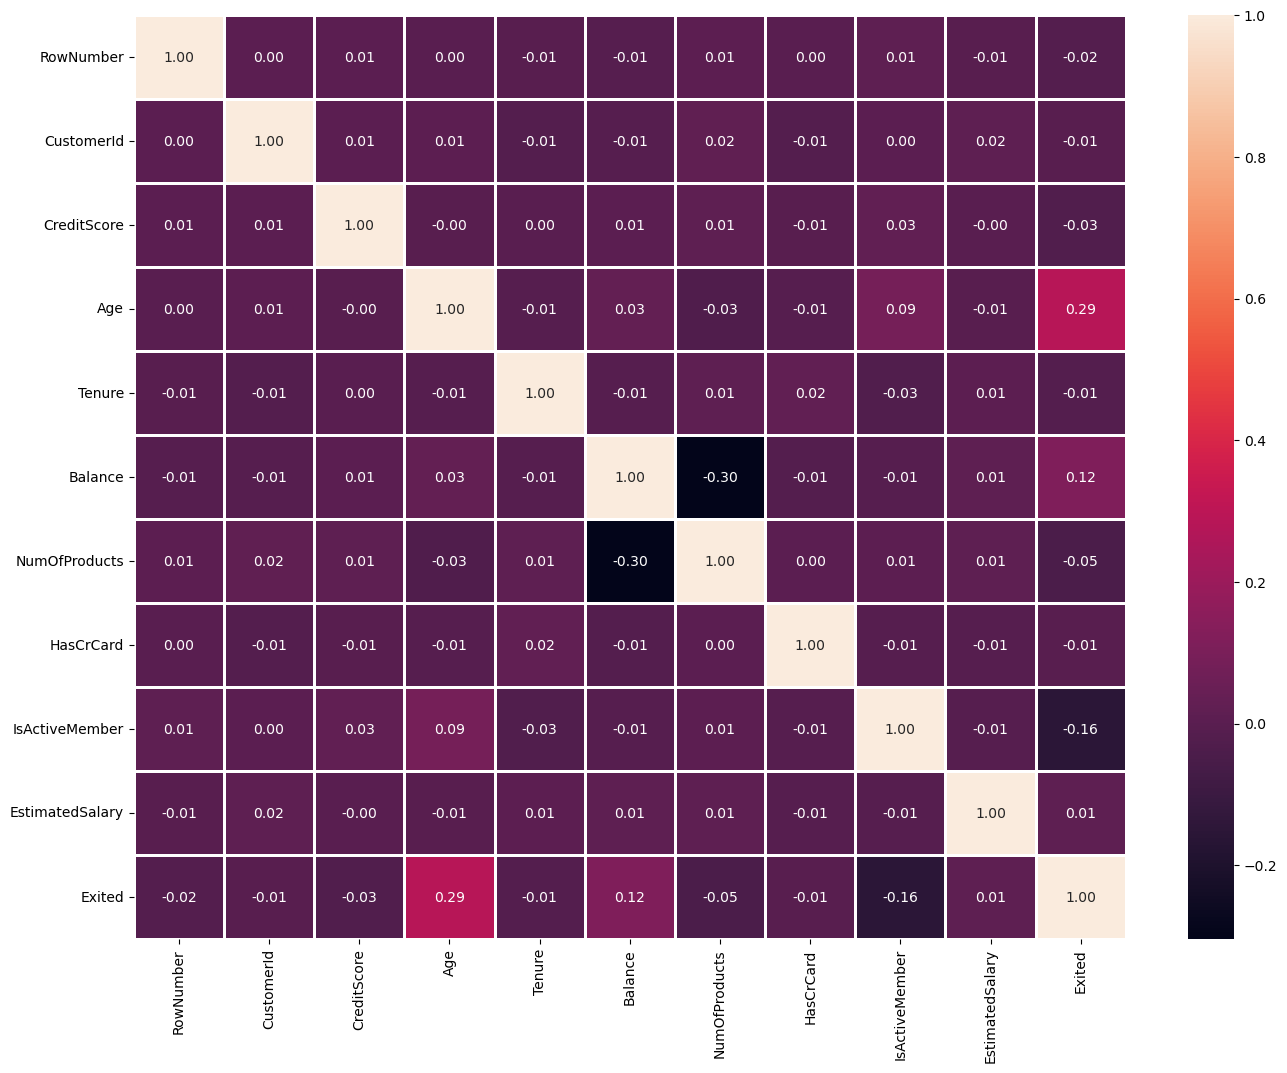

In [26]:
#check for multicollinearity
plt.figure(figsize = (16, 12))
corr = data.corr()
sns.heatmap(corr, linewidths = 1, annot =True, fmt = ".2f")
plt.show()


Inference:
* Low collinearity between number of products and balance, age and exited, isactivemember and exited

In [27]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(28, 45]"
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(28, 45]"
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(28, 45]"
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(28, 45]"
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(28, 45]"


In [28]:
#let's drop useless columns 
data.drop(['RowNumber','CustomerId', 'Surname'], axis=1, inplace=True)


In [29]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(28, 45]"
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(28, 45]"
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(28, 45]"
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(28, 45]"
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(28, 45]"


In [30]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [31]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  object  
 2   Gender           10000 non-null  object  
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
 11  AgeGroup         10000 non-null  category
dtypes: category(1), float64(2), int64(7), object(2)
memory usage: 869.7+ KB


In [33]:
#data['HasCrCard']=data['HasCrCard'].astype(object)
#data['IsActiveMember']=data['IsActiveMember'].astype(object)
#data['Exited']=data['Exited'].astype(object)


In [34]:
data.drop('AgeGroup', axis=1, inplace=True)

In [35]:
#mapping cat columns
data['Geography'] = data['Geography'].map({'France' : 2, 'Germany' : 1, 'Spain' : 0})
data['Gender'] = data['Gender'].map({'Male' : 0, 'Female' : 1})


In [36]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,2,1,42,2,0.00,1,1,1,101348.88,1
1,608,0,1,41,1,83807.86,1,0,1,112542.58,0
2,502,2,1,42,8,159660.80,3,1,0,113931.57,1
3,699,2,1,39,1,0.00,2,0,0,93826.63,0
4,850,0,1,43,2,125510.82,1,1,1,79084.10,0


In [37]:
data.to_csv('cleaned_data.csv')

UsageError: Cell magic `%%%%` not found.


<a id = "9" ></a>
# <span style="font-family:serif; font-size:28px;"> 6. Machine Learning Model Evaluations and Predictions</span>
<a id = "modelprediction" ></a>

In [39]:
#split data
train_data = data.drop(['Exited'],axis=1)
Y = data['Exited']

In [ ]:
#from sklearn.compose import make_column_transformer
#from sklearn.preprocessing import OneHotEncoder
#cat_cols = ['Geography','Gender']

#transformer = make_column_transformer(
    #(OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_cols),
    #remainder='passthrough')

#transformed = transformer.fit_transform(train_data)
#transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())
#transformed_df.head()

In [ ]:
#highly imbalanced data need to use stratify for target

x_train, x_test, y_train, y_test = train_test_split(train_data, Y, test_size=0.3, random_state=42, stratify=Y)

In [ ]:
list_of_parameters=[]

In [ ]:
#check best models: LinearRegression, SGDRegressor, RandomForestRegressor, XGBRegressor, Ridge, Lasso, ElasticNet
pipelines = []
#RobustScaler()
pipelines.append(('scaledLR' , (Pipeline([('scaled' , StandardScaler()),('LR' ,LogisticRegression())]))))
pipelines.append(('scaledRF' , (Pipeline([('scaled' , StandardScaler()),('RF' ,RandomForestClassifier())]))))
pipelines.append(('scaledXGB' , (Pipeline([('scaled' , StandardScaler()),('XGB' ,XGBClassifier(tree_method='gpu_hist'))]))))
pipelines.append(('scaledLGBM' , (Pipeline([('scaled' , StandardScaler()),('LGBM' ,LGBMClassifier(device='gpu'))]))))
pipelines.append(('scaledCatBoost', (Pipeline([('scaled' , StandardScaler()),('CTB', CatBoostClassifier(logging_level='Silent'))]))))

model_name = []
results = []
for pipe ,model in pipelines:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    crossv_results = cross_val_score(model , x_train ,y_train ,cv =kfold , scoring='f1')
    results.append(crossv_results)
    model_name.append(pipe)
    msg = "%s: %f (%f)" % (model_name, crossv_results.mean(), crossv_results.std())
    print(msg)
    
# Compare different Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_name)
plt.show()

In [ ]:
from sklearn.metrics import fbeta_score, make_scorer
f2_scorer = make_scorer(fbeta_score, beta=2.0)
recall_scorer = make_scorer(recall_score)


<a id = "101" ></a>
#### <b> Random Forest with Imbalanced Data</b>
<a id = "knn" ></a>

In [ ]:
# set parameter range for randomized search
parameters = dict(
    n_estimators = [100, 200, 400, 500,800, 1000, 1500],
    max_depth = [2,3,4,5, 6, 7, 8,9, 10, 11, 12, 15, None],
    min_samples_split= np.linspace(0.0, 1.0, 25, endpoint=True),
    min_samples_leaf=np.linspace(0, 0.5, 10, endpoint=True),
    bootstrap= [True, False],
    max_features= ['auto', 'sqrt']
    
    
)
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
random_model=RandomizedSearchCV(RandomForestClassifier(), param_distributions=parameters, cv=kfold, n_iter=150,scoring=recall_scorer)
random_model.fit(x_train, y_train) 

y_train_pred = random_model.predict(x_train) 
y_test_pred = random_model.predict(x_test) 

#Print the F1 score for train and test sets
print(f"train accuracy-score: {accuracy_score(y_train, y_train_pred)}") 
print(f"test accuracy-score: {accuracy_score(y_test, y_test_pred)}")



ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()



false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_pred)
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
pr_auc_score = auc(recall, precision)
print("ROC_AUC score: ",roc_auc)
print('Precision Recall AUC score: ', pr_auc_score)
print('Precision: %.3f' % precision_score(y_test, y_test_pred))
print('Recall: %.3f' % recall_score(y_test, y_test_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("Accuracy score: %.3f" % accuracy_score(y_test, y_test_pred))
list_of_parameters.append(['Imbalanced data','Random Forest', roc_auc,pr_auc_score, precision_score(y_test, y_test_pred),recall_score(y_test, y_test_pred),f1_score(y_test, y_test_pred),accuracy_score(y_test, y_test_pred)])
plot_roc_curve(random_model, x_test, y_test, name = "Random Forest")
plot_precision_recall_curve(random_model, x_test, y_test, name = "Random Forest")


<a id = "102" ></a>
#### <b> XGB Classifier with Imbalanced Data</b>
<a id = "xgb" ></a>

In [ ]:
# set parameter range for randomized search
parameters={ 
            "learning_rate"     : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
             "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
             "min_child_weight" : [ 1, 3, 5, 7 ],
             "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
             "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
             'n_estimators'     : [100, 200, 500, 1000],
             'random_state'     :[42],
            'scale_pos_weight'  :[3.9] # because training data is extremely unbalanced 
             
           }

kfold = KFold(n_splits=10, random_state=42, shuffle=True)
xgb_model=RandomizedSearchCV(XGBClassifier(tree_method='gpu_hist'), param_distributions=parameters, cv=kfold, n_iter=150,scoring=recall_scorer)
xgb_model.fit(x_train, y_train) 

y_train_pred = xgb_model.predict(x_train) 
y_test_pred = xgb_model.predict(x_test) 

#Print the F1 score for train and test sets
print(f"train accuracy-score: {accuracy_score(y_train, y_train_pred)}") 
print(f"test accuracy-score: {accuracy_score(y_test, y_test_pred)}")

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()


false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_pred)
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
pr_auc_score = auc(recall, precision)
print("roc_auc score: ",roc_auc)
print('pr_auc score: ', pr_auc_score)
print('Precision: %.3f' % precision_score(y_test, y_test_pred))
print('Recall: %.3f' % recall_score(y_test, y_test_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("Accuracy Score: %.3f" % accuracy_score(y_test, y_test_pred))
list_of_parameters.append(['Imbalanced data','XGB Classifier', roc_auc, pr_auc_score, precision_score(y_test, y_test_pred),recall_score(y_test, y_test_pred),f1_score(y_test, y_test_pred),accuracy_score(y_test, y_test_pred)])
plot_roc_curve(xgb_model, x_test, y_test, name = "XGB Classifier")
plot_precision_recall_curve(xgb_model, x_test, y_test, name = "XGB Classifier")


In [ ]:
xgb_model.best_params_



             

<a id = "103" ></a>
#### <b> LGBM Classifier with Imbalanced Data</b>
<a id = "lgbm" ></a>

In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

parameters ={
             'num_leaves'         :sp_randint(6, 50), 
             'min_child_samples'  :sp_randint(100, 500), 
             'min_child_weight'   :[1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample'          :sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree'   :sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha'          :[0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda'         :[0, 1e-1, 1, 5, 10, 20, 50, 100],
             'random_state'       :[42],
            'scale_pos_weight'    :[3.9] # because training data is extremely unbalanced 
            }

kfold = KFold(n_splits=10, random_state=42, shuffle=True)
lgb_model=RandomizedSearchCV(LGBMClassifier(device='gpu'), param_distributions=parameters,verbose=1, cv=kfold, n_iter=150,scoring=recall_scorer)
lgb_model.fit(x_train, y_train) 

y_train_pred = lgb_model.predict(x_train) 
y_test_pred = lgb_model.predict(x_test) 

#Print the F1 score for train and test sets
print(f"train accuracy-score: {accuracy_score(y_train, y_train_pred)}") 
print(f"test accuracy-score: {accuracy_score(y_test, y_test_pred)}")

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()


false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_pred)
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
pr_auc_score = auc(recall, precision)
print("roc_auc score: ",roc_auc)
print('pr_auc score: ', pr_auc_score)
print('Precision: %.3f' % precision_score(y_test, y_test_pred))
print('Recall: %.3f' % recall_score(y_test, y_test_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("Accuracy Score: %.3f" % accuracy_score(y_test, y_test_pred))
list_of_parameters.append(['Imbalanced data','LGBM Classifier', roc_auc, pr_auc_score, precision_score(y_test, y_test_pred),recall_score(y_test, y_test_pred),f1_score(y_test, y_test_pred),accuracy_score(y_test, y_test_pred)])
plot_roc_curve(lgb_model, x_test, y_test, name = "LGBM Classifier")
plot_precision_recall_curve(lgb_model, x_test, y_test, name = "LGBM Classifier")


<a id = "104" ></a>
#### <b> CatBoost Classifier with Imbalanced Data</b>
<a id = "catboost" ></a>

In [ ]:
parameters ={
             'min_child_samples': np.linspace(100,500,50), 
             "learning_rate": np.linspace(0,0.2,5),
             'reg_lambda': [0, 1, 5, 10, 20, 50, 100],
             'logging_level':['Silent'],
             'n_estimators':[100, 200, 500, 1000],
             'depth'       : [4,5,6,7,8,9, 10],
             'random_state'       :[42],
             'scale_pos_weight':[3.9] # because training data is extremely unbalanced
            }


kfold = KFold(n_splits=10, random_state=42, shuffle=True)
cbc_model=RandomizedSearchCV(CatBoostClassifier(task_type="GPU"), param_distributions=parameters,verbose=1, cv=kfold, n_iter=150,scoring=recall_scorer)
cbc_model.fit(x_train, y_train) 

y_train_pred = cbc_model.predict(x_train) 
y_test_pred = cbc_model.predict(x_test) 

#Print the F1 score for train and test sets
print(f"train accuracy-score: {accuracy_score(y_train, y_train_pred)}") 
print(f"test accuracy-score: {accuracy_score(y_test, y_test_pred)}")

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()



false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_pred)
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
pr_auc_score = auc(recall, precision)
print("roc_auc score: ",roc_auc)
print('pr_auc score: ', pr_auc_score)
print('Precision: %.3f' % precision_score(y_test, y_test_pred))
print('Recall: %.3f' % recall_score(y_test, y_test_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("Accuracy Score: %.3f" % accuracy_score(y_test, y_test_pred))
list_of_parameters.append(['Imbalanced data','CatBoost Classifier', roc_auc, pr_auc_score, precision_score(y_test, y_test_pred),recall_score(y_test, y_test_pred),f1_score(y_test, y_test_pred),accuracy_score(y_test, y_test_pred)])
plot_roc_curve(cbc_model, x_test, y_test, name = "CatBoost Classifier")
plot_precision_recall_curve(cbc_model, x_test, y_test, name = "CatBoost Classifier")


<a id = "105" ></a>
#### <b> Balancing Data using SMOTE + Tomek Links</b>
<a id = "smote" ></a>

In [ ]:

#because target is highly imbalanced i will use hybrid technique to balance data.
#Hybridization: SMOTE + Tomek Links.
#First oversample using SMOTE
#Second undersample using Tomek
#I will use only for training data. Test remains the same to represent the real distribution of data.

counter=Counter(y_train)
print('Before resampling', counter)

st=SMOTETomek(random_state=42)
x_train_st, y_train_st=st.fit_resample(x_train, y_train)

counter=Counter(y_train_st)
print('After resampling', counter)


#now x_train_st, y_train_st, x_test, y_test

In [ ]:
!pip install transformers

In [ ]:

#Logistic Regression 0

**Hyperparameters tuning**

<a id = "106" ></a>
#### <b> Random Forest with Balanced Data</b>
<a id = "rf_balanced" ></a>

In [ ]:
# set parameter range for randomized search
parameters ={
    'n_estimators'        :[100, 200, 400, 500,800, 1000, 1500],
    'max_depth'           :[2,3,4,5, 6, 7, 8,9, 10, 11, 12, 15, None],
    'min_samples_split'   :np.linspace(0.0, 1.0, 25, endpoint=True),
    'min_samples_leaf'    :np.linspace(0, 0.5, 10, endpoint=True),
    'bootstrap'           :[True, False],
    'random_state'        :[42],
    'max_features'        :['auto', 'sqrt']
    
    
}
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
random_model=RandomizedSearchCV(RandomForestClassifier(), param_distributions=parameters, cv=kfold, n_iter=150,scoring=recall_scorer)
random_model.fit(x_train_st, y_train_st) 

y_train_pred = random_model.predict(x_train_st) 
y_test_pred = random_model.predict(x_test) 

#Print the F1 score for train and test sets
print(f"train accuracy-score: {accuracy_score(y_train_st, y_train_pred)}") 
print(f"test accuracy-score: {accuracy_score(y_test, y_test_pred)}")


ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()



false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_pred)
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
pr_auc_score = auc(recall, precision)
print("ROC_AUC score: ",roc_auc)
print('Precision Recall AUC score: ', pr_auc_score)
print('Precision: %.3f' % precision_score(y_test, y_test_pred))
print('Recall: %.3f' % recall_score(y_test, y_test_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("Accuracy score: %.3f" % accuracy_score(y_test, y_test_pred))
list_of_parameters.append(['Balanced data','Random Forest', roc_auc,pr_auc_score, precision_score(y_test, y_test_pred),recall_score(y_test, y_test_pred),f1_score(y_test, y_test_pred),accuracy_score(y_test, y_test_pred)])
plot_roc_curve(random_model, x_test, y_test, name = "Random Forest")
plot_precision_recall_curve(random_model, x_test, y_test, name = "Random Forest")


In [ ]:
import joblib
#save trained model
joblib.dump(random_model, "random_forest_model.pkl")

<a id = "107" ></a>
#### <b> XGB Classifier with Balanced Data</b>
<a id = "xgb_balanced" ></a>

In [ ]:

parameters={ 
             "learning_rate"    :[0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
             "max_depth"        :[ 3, 4, 5, 6, 8, 10, 12, 15],
             "min_child_weight" :[ 1, 3, 5, 7 ],
             "gamma"            :[ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
             "colsample_bytree" :[ 0.3, 0.4, 0.5 , 0.7 ],
             'n_estimators'     :[100, 200, 500, 1000],
             'random_state'     :[42]
            
           }



kfold = KFold(n_splits=10, random_state=42, shuffle=True)
xgb_model=RandomizedSearchCV(XGBClassifier(tree_method='gpu_hist'), param_distributions=parameters,verbose=1, cv=kfold, n_iter=150,scoring=recall_scorer)
xgb_model.fit(x_train_st, y_train_st) 

y_train_pred = xgb_model.predict(x_train_st) 
y_test_pred = xgb_model.predict(x_test) 

#Print the F1 score for train and test sets
print(f"train accuracy-score: {accuracy_score(y_train_st, y_train_pred)}") 
print(f"test accuracy-score: {accuracy_score(y_test, y_test_pred)}")

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()




#print("Mean accuracy: %.3f", random_model.best_score_)
#print("config: %s", random_model.best_params_)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_pred)
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
pr_auc_score = auc(recall, precision)
print("ROC_AUC score: ",roc_auc)
print('Precision Recall AUC score: ', pr_auc_score)
print('Precision: %.3f' % precision_score(y_test, y_test_pred))
print('Recall: %.3f' % recall_score(y_test, y_test_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("Accuracy score: %.3f" % accuracy_score(y_test, y_test_pred))
list_of_parameters.append(['Balanced data','XGB Classifier', roc_auc,pr_auc_score, precision_score(y_test, y_test_pred),recall_score(y_test, y_test_pred),f1_score(y_test, y_test_pred),accuracy_score(y_test, y_test_pred)])
plot_roc_curve(xgb_model, x_test, y_test, name = "XGB Classifier")
plot_precision_recall_curve(xgb_model, x_test, y_test, name = "XGB Classifier")


<a id = "108" ></a>
#### <b> LGBM Classifier with Balanced Data</b>
<a id = "lgbm_balanced" ></a>

In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
parameters ={ 
            'num_leaves'          :sp_randint(6, 50), 
             'min_child_samples'  :sp_randint(100, 500), 
             'min_child_weight'   :[1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample'          :sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree'   :sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha'          :[0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda'         :[0, 1e-1, 1, 5, 10, 20, 50, 100],
             'random_state'       :[42]
            
            
            }

kfold = KFold(n_splits=10, random_state=42, shuffle=True)
lgb_model=RandomizedSearchCV(LGBMClassifier(device='gpu',), param_distributions=parameters,verbose=1, cv=kfold, n_iter=150,scoring=recall_scorer)
lgb_model.fit(x_train_st, y_train_st) 

y_train_pred = lgb_model.predict(x_train_st) 
y_test_pred = lgb_model.predict(x_test) 

#Print the F1 score for train and test sets
print(f"train accuracy-score: {accuracy_score(y_train_st, y_train_pred)}") 
print(f"test accuracy-score: {accuracy_score(y_test, y_test_pred)}")

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()



false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_pred)
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
pr_auc_score = auc(recall, precision)
print("ROC_AUC score: ",roc_auc)
print('Precision Recall AUC score: ', pr_auc_score)
print('Precision: %.3f' % precision_score(y_test, y_test_pred))
print('Recall: %.3f' % recall_score(y_test, y_test_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("Accuracy score: %.3f" % accuracy_score(y_test, y_test_pred))
list_of_parameters.append(['Balanced data','LGBM Classifier', roc_auc,pr_auc_score, precision_score(y_test, y_test_pred),recall_score(y_test, y_test_pred),f1_score(y_test, y_test_pred),accuracy_score(y_test, y_test_pred)])
plot_roc_curve(lgb_model, x_test, y_test, name = "LGBM Classifier")
plot_precision_recall_curve(lgb_model, x_test, y_test, name = "XGB Classifier")


<a id = "109" ></a>
#### <b> CatBoost Classifier with Balanced Data</b>
<a id = "catboost_balanced" ></a>

In [ ]:
parameters ={
             'min_child_samples'    :np.linspace(100,500,50), 
             "learning_rate"        :np.linspace(0,0.2,5),
             'reg_lambda'           :[0, 1, 5, 10, 20, 50, 100],
             'logging_level'        :['Silent'],
             'n_estimators'         :[100, 200, 500, 1000],
             'depth'                :[4,5,6,7,8,9, 10],
            'random_state'          :[42]
            }


kfold = KFold(n_splits=10, random_state=42, shuffle=True)
cbc_model=RandomizedSearchCV(CatBoostClassifier(task_type="GPU"), param_distributions=parameters,verbose=1, cv=kfold, n_iter=150,scoring=recall_scorer)
cbc_model.fit(x_train_st, y_train_st) 

y_train_pred = cbc_model.predict(x_train_st) 
y_test_pred = cbc_model.predict(x_test) 

#Print the F1 score for train and test sets
print(f"train accuracy-score: {accuracy_score(y_train_st, y_train_pred)}") 
print(f"test accuracy-score: {accuracy_score(y_test, y_test_pred)}")

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()


#print("Mean accuracy: %.3f", random_model.best_score_)
#print("config: %s", random_model.best_params_)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_pred)
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
pr_auc_score = auc(recall, precision)
print("ROC_AUC score: ",roc_auc)
print('Precision Recall AUC score: ', pr_auc_score)
print('Precision: %.3f' % precision_score(y_test, y_test_pred))
print('Recall: %.3f' % recall_score(y_test, y_test_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("Accuracy score: %.3f" % accuracy_score(y_test, y_test_pred))
list_of_parameters.append(['Balanced data','CatBoost Classifier', roc_auc,pr_auc_score, precision_score(y_test, y_test_pred),recall_score(y_test, y_test_pred),f1_score(y_test, y_test_pred),accuracy_score(y_test, y_test_pred)])
plot_roc_curve(cbc_model, x_test, y_test, name = "CatBoost Classifier")
plot_precision_recall_curve(cbc_model, x_test, y_test, name = "CatBoost Classifier")


<a id = "110" ></a>
#### <b> XGB Classifier Optuna</b>
<a id = "xgb_optuna" ></a>

In [ ]:
import optuna
from sklearn.metrics import fbeta_score
def objective(trial):
    
    #train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.15,random_state=42)
    param = {
        'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 10000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17]),
        'random_state': trial.suggest_categorical('random_state', [2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
        #'random_state': [42]
    }
    model = XGBClassifier(**param)  
    
    model.fit(x_train_st,y_train_st,eval_set=[(x_test,y_test)],early_stopping_rounds=100,verbose=False)
    
    y_test_pred = model.predict(x_test)
    
    
    f_beta=fbeta_score(y_test, y_test_pred, beta=2)
    
    
    return f_beta

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

In [ ]:
study.trials_dataframe()

In [ ]:
#plot_optimization_histor: shows the scores from all trials as well as the best score so far at each point.
optuna.visualization.plot_optimization_history(study)

In [ ]:
#plot_parallel_coordinate: interactively visualizes the hyperparameters and scores
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
'''plot_slice: shows the evolution of the search. You can see where in the hyperparameter space your search
went and which parts of the space were explored more.'''
optuna.visualization.plot_slice(study)

In [ ]:
#plot_contour: plots parameter interactions on an interactive chart. You can choose which hyperparameters you would like to explore.
optuna.visualization.plot_contour(study, params=['alpha',
                            #'max_depth',
                            'lambda',
                            'subsample',
                            'learning_rate',
                            'subsample'])

In [ ]:
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study)

In [ ]:
#Visualize empirical distribution function
optuna.visualization.plot_edf(study)

In [ ]:
#let's build new model xgboost with the best hyperparameters
Best_trial = study.best_trial.params
Best_trial["n_estimators"], Best_trial["tree_method"] = 10000, 'gpu_hist'
Best_trial['metric']='recall_score'
Best_trial

In [ ]:
parameters={'device_type': 'gpu',
 'reg_alpha': 0.6456863928383331,
 'reg_lambda': 0.15719791951804135,
 'colsample_bytree': 0.8,
 'subsample': 0.7,
 'learning_rate': 0.017,
 'max_depth': 20,
 'num_leaves': 161,
 'min_child_samples': 131,
 'min_data_per_groups': 69,
 'n_estimators': 10000,
 'tree_method': 'gpu_hist',
 'metric': 'recall_score',
           'verbose':1}





kfold = KFold(n_splits=10, random_state=42, shuffle=True)

#xgb_model=GridSearchCV(XGBClassifier(),param_grid = parameters, verbose=1, cv=kfold)
xgb_model_optuna=XGBClassifier(**parameters)
xgb_model_optuna.fit(x_train_st, y_train_st) 

y_train_pred = xgb_model_optuna.predict(x_train_st) 
y_test_pred = xgb_model_optuna.predict(x_test) 

#Print the F1 score for train and test sets
print(f"train accuracy-score: {accuracy_score(y_train_st, y_train_pred)}") 
print(f"test accuracy-score: {accuracy_score(y_test, y_test_pred)}")

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()




#print("Mean accuracy: %.3f", random_model.best_score_)
#print("config: %s", random_model.best_params_)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_pred)
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
pr_auc_score = auc(recall, precision)
print("ROC_AUC score: ",roc_auc)
print('Precision Recall AUC score: ', pr_auc_score)
print('Precision: %.3f' % precision_score(y_test, y_test_pred))
print('Recall: %.3f' % recall_score(y_test, y_test_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("Accuracy score: %.3f" % accuracy_score(y_test, y_test_pred))
list_of_parameters.append(['Balanced data','XGB Optuna', roc_auc,pr_auc_score, precision_score(y_test, y_test_pred),recall_score(y_test, y_test_pred),f1_score(y_test, y_test_pred),accuracy_score(y_test, y_test_pred)])
plot_roc_curve(xgb_model_optuna, x_test, y_test, name = "XGB Classifier")
plot_precision_recall_curve(xgb_model_optuna, x_test, y_test, name = "XGB Classifier")


In [ ]:
from tabulate import tabulate

['Imbalanced data', 'Random Forest', 0.5, 0.6018333333333333, 0.0, 0.0, 0.0, 0.7963333333333333]
['Imbalanced data', 'XGB Classifier', 0.7318574837344375, 0.7013025095471904, 0.8053333333333333, 0.49427168576104746, 0.6125760649087221, 0.8726666666666667]
['Imbalanced data', 'LGBM Classifier', 0.7348649942898404, 0.6943367309591387, 0.7822784810126582, 0.5057283142389526, 0.6143141153081512, 0.8706666666666667]
['Imbalanced data', 'CatBoost Classifier', 0.7291178402922834, 0.6847836900255285, 0.7709923664122137, 0.4959083469721768, 0.603585657370518, 0.8673333333333333]
['Balanced data', 'Random Forest', 0.7248144968859591, 0.5882887788975059, 0.4685230024213075, 0.6333878887070377, 0.5386221294363257, 0.779]
['Balanced data', 'XGB Classifier', 0.7524996934257463, 0.6286812440411466, 0.538881309686221, 0.646481178396072, 0.5877976190476191, 0.8153333333333334]
['Balanced data', 'LGBM Classifier', 0.7720454291662755, 0.6492385876716018, 0.5421994884910486, 0.6939443535188216, 0.6087580760947596, 0.8183333333333334]
['Balanced data', 'CatBoost Classifier', 0.7591802718268879, 0.6348237143595487, 0.5355263157894737, 0.6661211129296236, 0.5937272064186725, 0.8143333333333334]
['Balanced data', 'XGB Classifier', 0.7504067675153235, 0.62505485568525, 0.531628532974428, 0.646481178396072, 0.5834564254062039, 0.812]
['Balanced data', 'CatBoost Classifier Optuna', 0.7734727977863626, 0.6507797509217078, 0.5426751592356688, 0.6972176759410802, 0.6103151862464183, 0.8186666666666667]
['Balanced data', 'CatBoost Classifier Optuna', 0.7734727977863626, 0.6507797509217078, 0.5426751592356688, 0.6972176759410802, 0.6103151862464183, 0.8186666666666667]
['Balanced data', 'XGB Classifier', 0.7504067675153235, 0.62505485568525, 0.531628532974428, 0.646481178396072, 0.5834564254062039, 0.812]

<a id = "111" ></a>
#### <b> LGB Classifier Optuna</b>
<a id = "lgb_optuna" ></a>

In [ ]:
#LGBM+optuna optimizer
def objective(trial):
    
    #train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2,random_state=42)
    param = {
        "device_type": trial.suggest_categorical("device_type", ['gpu']),
        #'metric': 'Logloss', 
        'random_state': 48,
        'n_estimators': 20000,
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.006,0.008,0.01,0.014,0.017,0.02]),
        'max_depth': trial.suggest_categorical('max_depth', [10,20,100]),
        'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
        'cat_smooth' : trial.suggest_int('min_data_per_groups', 1, 100)
    }
    model_lgbm_optuna = LGBMClassifier(**param) 
    
    model_lgbm_optuna.fit(x_train_st,y_train_st,eval_set=[(x_test,y_test)],eval_metric="binary_logloss", early_stopping_rounds=200,verbose=False)
    
    y_test_pred = model_lgbm_optuna.predict(x_test)
    
    
    f_beta=fbeta_score(y_test, y_test_pred, beta=2)
    
    
    return f_beta

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

In [ ]:
study.trials_dataframe()

In [ ]:
#plot_optimization_histor: shows the scores from all trials as well as the best score so far at each point.
optuna.visualization.plot_optimization_history(study)

In [ ]:
#plot_parallel_coordinate: interactively visualizes the hyperparameters and scores
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
'''plot_slice: shows the evolution of the search. You can see where in the hyperparameter space your search
went and which parts of the space were explored more.'''
optuna.visualization.plot_slice(study)

In [ ]:
#plot_contour: plots parameter interactions on an interactive chart. You can choose which hyperparameters you would like to explore.
optuna.visualization.plot_contour(study, params=['num_leaves',
                            'max_depth',
                            'subsample',
                            'learning_rate',
                            'subsample'])

In [ ]:
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study)

In [ ]:


#Visualize empirical distribution function
optuna.visualization.plot_edf(study)

In [ ]:
params=study.best_params   
params['random_state'] = 2020
params['n_estimators'] = 20000 
params['metric'] = 'recall_score'

In [ ]:
# I changed min_data_per_groups to cat_smooth beacuse when I used LGBM params in optuna I named cat_smooth
# as min_data_per_groups (there is no parameter named min_data_per_groups in LGBM !!!)
params['cat_smooth'] = params.pop('min_data_per_groups')

In [ ]:
params

In [ ]:
parameters={'device_type': 'gpu',
 'reg_alpha': 0.6456863928383331,
 'reg_lambda': 0.15719791951804135,
 'colsample_bytree': 0.8,
 'subsample': 0.7,
 'learning_rate': 0.017,
 'max_depth': 20,
 'num_leaves': 161,
 'min_child_samples': 131,
 'random_state': 2020,
 'n_estimators': 20000,
 'metric': 'recall_score',
 'cat_smooth': 69}

kfold = KFold(n_splits=10, random_state=42, shuffle=True)

#xgb_model=GridSearchCV(XGBClassifier(),param_grid = parameters, verbose=1, cv=kfold)
lgb_model_optuna_best=LGBMClassifier(**parameters)
lgb_model_optuna_best.fit(x_train_st, y_train_st) 

y_train_pred = lgb_model_optuna_best.predict(x_train_st) 
y_test_pred = lgb_model_optuna_best.predict(x_test) 

#Print the F1 score for train and test sets
print(f"train accuracy-score: {accuracy_score(y_train_st, y_train_pred)}") 
print(f"test accuracy-score: {accuracy_score(y_test, y_test_pred)}")

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()




#print("Mean accuracy: %.3f", random_model.best_score_)
#print("config: %s", random_model.best_params_)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_pred)
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
pr_auc_score = auc(recall, precision)
print("ROC_AUC score: %.3f" % roc_auc)
print('Precision Recall AUC score: %.3f' %pr_auc_score)
print('Precision: %.3f' % precision_score(y_test, y_test_pred))
print('Recall: %.3f' % recall_score(y_test, y_test_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("Accuracy score: %.3f" % accuracy_score(y_test, y_test_pred))
list_of_parameters.append(['Balanced data','LGB  Optuna', roc_auc,pr_auc_score, precision_score(y_test, y_test_pred),recall_score(y_test, y_test_pred),f1_score(y_test, y_test_pred),accuracy_score(y_test, y_test_pred)])
plot_roc_curve(lgb_model_optuna_best, x_test, y_test, name = "LGB Classifier")
plot_precision_recall_curve(lgb_model_optuna_best, x_test, y_test, name = "LGB Classifier")


In [ ]:
import plotly.graph_objects as go
header=["Type of data", "Model", 'ROC-AUC', 'Precision-Recall-AUC', 'Precision', 'Recall', 'F1-score', 'Accuracy']
full_table=[header, *list_of_parameters]
fig = go.Figure(data=[go.Table(
                 cells=dict(values=full_table))
                     ])
fig.show()

In [ ]:
print(list_of_parameters)
#[['Imbalanced data', 'Random Forest', 0.5, 0.6, 0.0, 0.0, 0.0, 0.8], ['Imbalanced data', 'XGB Classifier', 0.73, 0.69, 0.79, 0.49, 0.6, 0.87], ['Imbalanced data', 'LGBM Classifier', 0.74, 0.7, 0.8, 0.5, 0.62, 0.87], ['Imbalanced data', 'CatBoost Classifier', 0.73, 0.69, 0.78, 0.49, 0.6, 0.87], ['Balanced data', 'Random Forest', 0.71, 0.57, 0.41, 0.66, 0.51, 0.74], ['Balanced data', 'XGB Classifier', 0.75, 0.64, 0.57, 0.63, 0.6, 0.83], ['Balanced data', 'LGBM Classifier', 0.77, 0.65, 0.55, 0.69, 0.61, 0.82], ['Balanced data', 'CatBoost Classifier', 0.75, 0.63, 0.53, 0.65, 0.59, 0.81], ['Balanced data', 'XGB Classifier', 0.75, 0.63, 0.53, 0.65, 0.58, 0.81], ['Balanced data', 'LGB  Optuna', 0.7345340996205331, 0.6082226232807469, 0.5292439372325249, 0.6072013093289689, 0.5655487804878049, 0.81], ['Balanced data', 'LGB  Optuna', 0.735124297876451, 0.6083220616383256, 0.5268361581920904, 0.6104746317512275, 0.5655799848369977, 0.809]]

In [ ]:
from optuna.integration import lightgbm as lgb
lgb.plot_importance(lgb_model_optuna_best, max_num_features=10, figsize=(10,10))
plt.show()

Model Interpretation SHAP

In [ ]:
!pip install shap



<a id = "112" ></a>
#### <b> Shap Explainer</b>
<a id = "shap" ></a>

In [ ]:
import shap

In [ ]:
shap_values = shap.TreeExplainer(lgb_model_optuna_best).shap_values(x_train_st)
shap.summary_plot(shap_values, x_train_st, plot_type="bar")
#Age, IsActivemember NumofProducts, Geography, Balance, haccrcard, Tenure, EstimatedSalary, CreditScore, Gender

In [ ]:

shap.summary_plot(shap_values, x_train_st)

<a id = "113" ></a>
#### <b> Feature Importance</b>
<a id = "feature" ></a>

In [ ]:
import xgboost as xgb

In [ ]:
xgb.plot_importance(xgb_model_optuna)
plt.figure(figsize = (16, 12))
plt.show()
#Balance, Geography, Tenure, creditScore, Gender, EstimatedSalary, IsActiveMember, HAsCRCArd, AGE, NUmofproducts

<a id = "114" ></a>
#### <b> Feature Selection</b>
<a id = "feature_selection" ></a>

In [ ]:
train_data = data.drop(['Exited'],axis=1)
Y = data['Exited']
x_train, x_test, y_train, y_test = train_test_split(train_data, Y, test_size=0.3, random_state=42, stratify=Y)
#because target is highly imbalanced i will use hybrid technique to balance data.
#Hybridization: SMOTE + Tomek Links.
#First oversample using SMOTE
#Second undersample using Tomek
#I will use only for training data. Test remains the same to represent the real distribution of data.

counter=Counter(y_train)
print('Before resampling', counter)

st=SMOTETomek(random_state=42)
x_train_st, y_train_st=st.fit_resample(x_train, y_train)

counter=Counter(y_train_st)
print('After resampling', counter)


#now x_train_st, y_train_st, x_test, y_test

In [ ]:
train_data.columns

In [ ]:
import lightgbm as lgb
# Feature importance

#lightGBM model fit
gbm = lgb.LGBMClassifier()
gbm.fit(train_data, Y)
gbm.booster_.feature_importance()

# importance of each attribute
fea_imp_ = pd.DataFrame({'cols':train_data.columns, 'fea_imp':gbm.feature_importances_})
fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False)

In [ ]:
#Recursive Feature Elimination(RFE)
from sklearn.feature_selection import RFE
# create the RFE model and select 10 attributes
rfe = RFE(estimator=gbm, n_features_to_select=8)

rfe = rfe.fit(train_data, Y)

# summarize the selection of the attributes
print(rfe.support_)

# summarize the ranking of the attributes
fea_rank_ = pd.DataFrame({'cols':train_data.columns, 'fea_rank':rfe.ranking_})
fea_rank_.loc[fea_rank_.fea_rank > 0].sort_values(by=['fea_rank'], ascending = True)

In [ ]:
train_eliminated=train_data.copy()

In [ ]:
train_eliminated.drop(['Gender', 'HasCrCard'], axis=1, inplace=True)

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(train_eliminated, Y, test_size=0.3, random_state=42, stratify=Y)
#because target is highly imbalanced i will use hybrid technique to balance data.
#Hybridization: SMOTE + Tomek Links.
#First oversample using SMOTE
#Second undersample using Tomek
#I will use only for training data. Test remains the same to represent the real distribution of data.

counter=Counter(y_train)
print('Before resampling', counter)

st=SMOTETomek(random_state=42)
x_train_st, y_train_st=st.fit_resample(x_train, y_train)

counter=Counter(y_train_st)
print('After resampling', counter)


#now x_train_st, y_train_st, x_test, y_test

In [128]:
from sklearn.metrics import fbeta_score,make_scorer,recall_score,precision_score


<a id = "115" ></a>
#### <b> LGBM Classifier Optuna with Eliminated Data</b>
<a id = "lgbm_eliminated" ></a>

In [ ]:
#LGBM+optuna optimizer
def objective(trial):
    
    #train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2,random_state=42)
    param = {
        "device_type": trial.suggest_categorical("device_type", ['gpu']),
        #'metric': 'Logloss', 
        'random_state': 48,
        'n_estimators': 20000,
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.006,0.008,0.01,0.014,0.017,0.02]),
        'max_depth': trial.suggest_categorical('max_depth', [10,20,100]),
        'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
        'cat_smooth' : trial.suggest_int('min_data_per_groups', 1, 100)
    }
    model_lgbm_optuna = LGBMClassifier(**param) 
    
    model_lgbm_optuna.fit(x_train_st,y_train_st,eval_set=[(x_test,y_test)],eval_metric="binary_logloss", early_stopping_rounds=200,verbose=False)
    
    y_test_pred = model_lgbm_optuna.predict(x_test)
    
    
    f_beta=fbeta_score(y_test, y_test_pred, beta=2)
    
    
    return f_beta

In [ ]:
import optuna
from sklearn.metrics import fbeta_score
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

In [ ]:
study.trials_dataframe()

In [ ]:
#plot_optimization_histor: shows the scores from all trials as well as the best score so far at each point.
optuna.visualization.plot_optimization_history(study)

In [ ]:
#plot_parallel_coordinate: interactively visualizes the hyperparameters and scores
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
'''plot_slice: shows the evolution of the search. You can see where in the hyperparameter space your search
went and which parts of the space were explored more.'''
optuna.visualization.plot_slice(study)

In [ ]:
#plot_contour: plots parameter interactions on an interactive chart. You can choose which hyperparameters you would like to explore.
optuna.visualization.plot_contour(study, params=['num_leaves',
                            'max_depth',
                            'subsample',
                            'learning_rate',
                            'subsample'])

In [ ]:
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study)

In [ ]:
#Visualize empirical distribution function
optuna.visualization.plot_edf(study)

In [129]:
f2_scorer = make_scorer(fbeta_score, beta=2.0)
recall_scorer = make_scorer(recall_score)

In [ ]:
params=study.best_params   
params['random_state'] = 2020
params['n_estimators'] = 20000 
params['metric'] = 'recall_score'

In [ ]:
# I changed min_data_per_groups to cat_smooth beacuse when I used LGBM params in optuna I named cat_smooth
# as min_data_per_groups (there is no parameter named min_data_per_groups in LGBM !!!)
params['cat_smooth'] = params.pop('min_data_per_groups')

In [ ]:
params

In [ ]:
parameters={'device_type': 'gpu',
 'reg_alpha': 0.0034396678742056224,
 'reg_lambda': 5.2499262161256715,
 'colsample_bytree': 0.9,
 'subsample': 0.7,
 'learning_rate': 0.02,
 'max_depth': 100,
 'num_leaves': 267,
 'min_child_samples': 116,
 'random_state': 2020,
 'n_estimators': 20000,
 'metric': 'recall_score',
 'cat_smooth': 19}

kfold = KFold(n_splits=10, random_state=42, shuffle=True)

#xgb_model=GridSearchCV(XGBClassifier(),param_grid = parameters, verbose=1, cv=kfold)

lgb_model_optuna_best_eliminated=LGBMClassifier(**parameters)
lgb_model_optuna_best_eliminated.fit(x_train_st, y_train_st) 

y_train_pred = lgb_model_optuna_best_eliminated.predict(x_train_st) 
y_test_pred = lgb_model_optuna_best_eliminated.predict(x_test) 

#Print the F1 score for train and test sets
print(f"train accuracy-score: {accuracy_score(y_train_st, y_train_pred)}") 
print(f"test accuracy-score: {accuracy_score(y_test, y_test_pred)}")

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()




#print("Mean accuracy: %.3f", random_model.best_score_)
#print("config: %s", random_model.best_params_)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_pred)
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
pr_auc_score = auc(recall, precision)
print("ROC_AUC score: %.3f" % roc_auc)
print('Precision Recall AUC score: %.3f' %pr_auc_score)
print('Precision: %.3f' % precision_score(y_test, y_test_pred))
print('Recall: %.3f' % recall_score(y_test, y_test_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("Accuracy score: %.3f" % accuracy_score(y_test, y_test_pred))
list_of_parameters.append(['Balanced Cut data','LGB  Optuna', roc_auc,pr_auc_score, precision_score(y_test, y_test_pred),recall_score(y_test, y_test_pred),f1_score(y_test, y_test_pred),accuracy_score(y_test, y_test_pred)])
plot_roc_curve(lgb_model_optuna_best_eliminated, x_test, y_test, name = "LGB Classifier")
plot_precision_recall_curve(lgb_model_optuna_best_eliminated, x_test, y_test, name = "LGB Classifier")


In [ ]:
beta_score_list = []
for i in range(1,101):
    fbeta_results = fbeta_score(y_test,y_test_pred,beta=i)
    beta_score_list.append(fbeta_results)

In [ ]:
fig2 = plt.figure(figsize=(10,6))
sns.lineplot(x=range(1,101),y=beta_score_list)
plt.title("Fbeta scores with beta 0 to 100")

<a id = "116" ></a>
#### <b> Table with models scores</b>
<a id = "table" ></a>

In [ ]:
print("Type of data", "Model", 'ROC-AUC', 'Precision-Recall-AUC', 'Precision', 'Recall', 'F1-score', 'Accuracy')

def is_float(s):
    result = False
    if s.count(".") == 1:
        if s.replace(".", "").isdigit():
            result = True
    return result

for x in list_of_parameters:
    for i, item in enumerate(x):
        if is_float(str(item)):
            #print('yes', x[i])
            x[i]=float("{:.2f}".format(float(item)))
print(list_of_parameters)


 #list_of_parameters
# assign data

 
# create header
head = ["Type of data", "Model", 'ROC-AUC', 'Precision-Recall-AUC', 'Precision', 'Recall', 'F1-score', 'Accuracy']
 
# display table
print(tabulate(list_of_parameters, headers=head, tablefmt="grid"))

import plotly.graph_objects as go
header=["Type of data", "Model", 'ROC-AUC', 'Precision-Recall-AUC', 'Precision', 'Recall', 'F1-score', 'Accuracy']
full_table=[header, *list_of_parameters]
fig = go.Figure(data=[go.Table(
                 cells=dict(values=full_table))
                     ])
fig.show()

<p> Best Model XGB Classifier built on imbalanced data based on Recall metric. </p>
*xgb_model.best_params_
<p> {'random_state': 42,
 'n_estimators': 1000,
 'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.1,
 'gamma': 0.0,
 'colsample_bytree': 0.4,
'scale_pos_weight'  :[3.9]}</p>

> > 

<a id = "117" ></a>
#### <b> Lime with best XGB Classifier</b>
<a id = "lime" ></a>

In [ ]:
import lime
from lime import lime_tabular
from sklearn.preprocessing import LabelEncoder

In [ ]:
data.columns

In [ ]:
import shap
feature_names = list(train_data.columns)
feature_names

In [ ]:
cat_cols=['Geography', 'Gender','HasCrCard','IsActiveMember']

In [ ]:
cat_indices = [feature_names.index(col) for col in cat_cols]
cat_indices

In [ ]:
#mapping the category values to their names. for example, {"sex"={0="female", 1="male"}}
import lime
import lime.lime_tabular

# LIME has one explainer for all the models
explainer = lime.lime_tabular.LimeTabularExplainer(train_data.values, feature_names=train_data.columns.values.tolist(),
                                                  class_names=['Not Exited', 'Exited'], verbose=True, mode='classification')

In [ ]:
j = 1
exp = explainer.explain_instance(train_data.values[j], xgb_model.predict_proba, num_features=5)


In [ ]:
exp.show_in_notebook(show_table=True)

1. The left graph shows that sample 1 in the data shows the confidence interval stating that this data is 1% churn whereas 99% indicates the instance did not churn.
2. The center graph shows the feature importance scores on this particular sample with NumOfProducts having 13% feature importance score, followed by Geography with 5%, HasCrCard  with 7%, and CreditScore>584.00 with 5% for 'Exited' class; and with IsActiveMember having 25% for 'Not Exited' class.
3. The graph shows the top five features and their respective values. The features highlighted in orange contribute toward class 1 (Exited) whereas features highlighted in blue contribute toward class 0 (not Exited).

In [ ]:
# Let's use SP-LIME to return explanations on a few sample data sets 
# and obtain a non-redundant global decision perspective of the black-box model
from lime import lime_tabular
import warnings
from lime import submodular_pick

sp_exp = submodular_pick.SubmodularPick(explainer, 
                                        train_data[train_data.columns].values,
                                        xgb_model.predict_proba,
                                        sample_size=20,
                                        num_features=10,
                                        num_exps_desired=5)

#sp_obj = submodular_pick.SubmodularPick(explainer, train_data, lgb_model.predict, sample_size=20, num_features=10, num_exps_desired=5)

In [ ]:
[exp.show_in_notebook() for exp in sp_exp.sp_explanations]
print('SP-LIME Explanations.')

In [ ]:
[exp.as_pyplot_figure(label=exp.available_labels()[0]) for exp in sp_exp.sp_explanations]
print('SP-LIME Local Explanations')

In [ ]:

import joblib
#save trained model
joblib.dump(xgb_model, "best_xgb_classifier.pkl")

<a id = "10" ></a>
# <span style="font-family:serif; font-size:28px;"> 7. Conclusion</span>
<a id = "conclusion" ></a>



<b> Best XGB Classifier has following scores: </b>


<ul class="b">
  <li>train accuracy-score: 0.8168571428571428</li>
  <li>test accuracy-score: 0.8083333333333333</li>
  <li>roc_auc score:  0.7992637422337378</li>
  <li>pr_auc score:  0.6737417483518006</li>
  <li>Precision: 0.520</li>
  <li>Recall: 0.784</li>
  <li>F1 Score: 0.625</li>
</ul>

<table>
  <tr>
    <th>...</th>
    <th>precision</th>
    <th>recall</th>
    <th>f1-score</th>
    <th>support</th>
  </tr>
  <tr>
    <th>0</th>
    <th>0.94</th>
    <th>0.81</th>
    <th>0.87</th>
    <th>2389</th>
  </tr>
  <tr>
    <th>1</th>
    <th>0.52</th>
    <th>0.78</th>
    <th>0.62</th>
    <th>611</th>
  </tr>
  <tr>
    <th>accuracy</th>
    <th></th>
    <th></th>
    <th>0.81</th>
    <th>3000</th>
  </tr>
  <tr>
    <th>macro_avg</th>
    <th>0.73</th>
    <th>0.8</th>
    <th>0.75</th>
    <th>3000</th>
  </tr>
  <tr>
    <th>weighted avg</th>
    <th>0.85</th>
    <th>0.81</th>
    <th>0.82</th>
    <th>3000</th>
  </tr>
</table>



* Confusion Matrix:

<table>
  <tr>
    <th>1946</th>
    <th>443</th>
  </tr>
  <tr>
    <th>132</th>
    <th>479</th>
  </tr>
</table>



<h1 style="background-color:powderblue;"></h1>

<p> 1. The data are highly imbalanced, so I couldn't use Accuracy or ROC_AUC metrics. The metric I chose to predict churn was Recall because it was important to reduce False Negatives.  When training the model, I tried to find the solution with the highest Recall, the second important metric was Precision.</p>

<p> 2. From the confusion matrix we can see that: there are total 1946+443=2389 actual non-churn values and the algorithm predicts 1946 of them as non churn and 443 of them as churn. While there are 132+479=611 actual churn values and the algorithm predicts 132 of them as non churn values and 479 of them as churn values.</p>

<p> 3. Customer churn is definitely bad to a firm ’s profitability. Various strategies can be implemented to eliminate customer churn. The best way to avoid customer churn is for a company to truly know its customers. This includes identifying customers who are at risk of churning and working to improve their satisfaction. Improving customer service is, of course, at the top of the priority for tackling this issue. Building customer loyalty through relevant experiences and specialized service is another strategy to reduce customer churn. Some firms survey customers who have already churned to understand their reasons for leaving in order to adopt a proactive approach to avoiding future customer churn.</p>

<p> 4. However, in as much as the model has a high Recall, it still misses those who end up churning. This could be improved by providing retraining the model with more data over time. It is also important to impove Precision score, because right now model works as random for False Positives.</p>

<a id = "11" ></a>
# <span style="font-family:serif; font-size:28px;"> 8. Addition. Unsupervised Learning. Customer Segmentation</span>
<a id = "segmentation" ></a>

Customer segmentation by behavioral data: Balance, CreditScore, EstimatedSalary

In [50]:
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [ ]:
##train_data = data.drop(['Exited'],axis=1)
##Y = data['Exited']

In [40]:
train_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,2,1,42,2,0.00,1,1,1,101348.88
1,608,0,1,41,1,83807.86,1,0,1,112542.58
2,502,2,1,42,8,159660.80,3,1,0,113931.57
3,699,2,1,39,1,0.00,2,0,0,93826.63
4,850,0,1,43,2,125510.82,1,1,1,79084.10


In [43]:
data_cluster=pd.DataFrame()
data_cluster['Balance']=train_data['Balance']
data_cluster['CreditScore']=train_data['CreditScore']
data_cluster['EstimatedSalary']=train_data['EstimatedSalary']

In [44]:
data_cluster.head()

,Balance,CreditScore,EstimatedSalary
0,0.00,619,101348.88
1,83807.86,608,112542.58
2,159660.80,502,113931.57
3,0.00,699,93826.63
4,125510.82,850,79084.10


In [46]:
#Scaling data_cluster features 
scaler = StandardScaler()
scaler.fit(data_cluster)
scaled_data_cluster = pd.DataFrame(scaler.transform(data_cluster),columns= data_cluster.columns )
print("All features are now scaled")

All features are now scaled


In [47]:
scaled_data_cluster.head()

,Balance,CreditScore,EstimatedSalary
0,-1.225848,-0.326221,0.021886
1,0.117350,-0.440036,0.216534
2,1.333053,-1.536794,0.240687
3,-1.225848,0.501521,-0.108918
4,0.785728,2.063884,-0.365276


I chose 3 dimensions, scaled data. I will be performing clustering via 3 types of clustering. 

Steps involved in the Clustering

1. Elbow Method to determine the number of clusters to be formed
2. Clustering via KMean Clustering, Agglomerative Clustering and Spectral Clustering
3. Comparing Clustering algorithms and choosing best via Silhouette, Davies - Bouldin Index, Calinski - Harabasz Index and plots.

Elbow Method to determine the number of clusters to be formed:


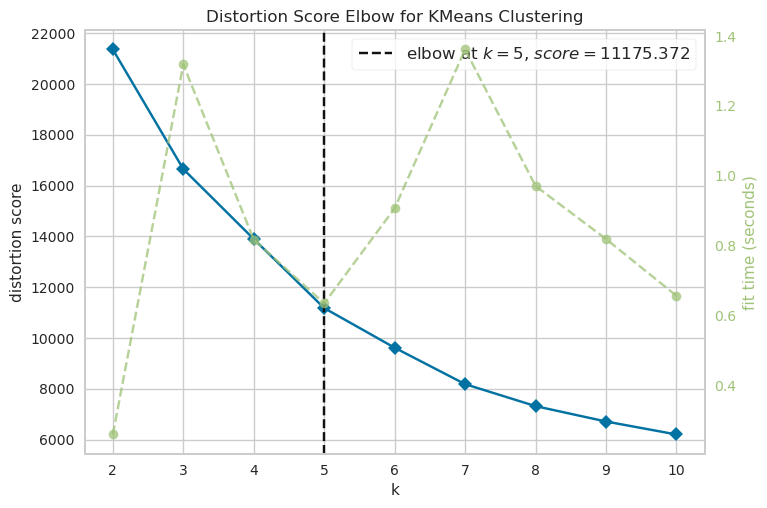

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(scaled_data_cluster)
Elbow_M.show()

Inference: The above cell indicates that 5 will be an optimal number of clusters for this data. Next, let's use the Agglomerative Clustering Model to get the final clusters.

In [51]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat_AC = AC.fit_predict(scaled_data_cluster)
#scaled_data_cluster["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
#train_data["Clusters"]= yhat_AC

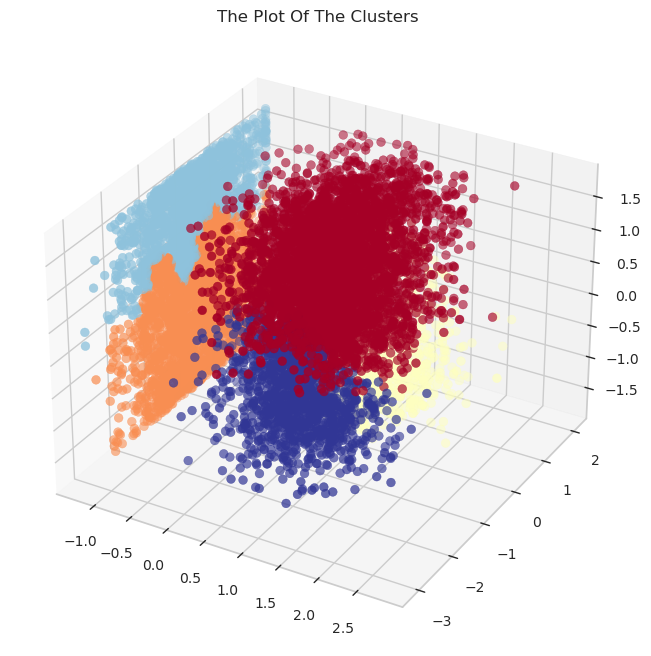

In [55]:
#Plotting the clusters
# Balance	CreditScore	EstimatedSalary
x =scaled_data_cluster["Balance"]
y =scaled_data_cluster["CreditScore"]
z =scaled_data_cluster["EstimatedSalary"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=yhat_AC, marker='o', cmap= plt.cm.get_cmap('RdYlBu') )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [64]:
algorithms = []
algorithms.append([KMeans(n_clusters=5, random_state=1), 'kmeans'])
algorithms.append([SpectralClustering(n_clusters=5, random_state=1,
                                     affinity='nearest_neighbors'), 'spectral clustering'])
algorithms.append([AgglomerativeClustering(n_clusters=5), 'agglomerative clustering'])

data = []
for algo in algorithms:
    
    print(algo[1])
    algo[0].fit(scaled_data_cluster)
    data.append(({
        'Silhouette': metrics.silhouette_score(scaled_data_cluster, algo[0].labels_),
        'Davies-Bouldin Index': metrics.davies_bouldin_score(scaled_data_cluster, algo[0].labels_),
        'Calinski-Harabasz Index': metrics.calinski_harabasz_score(scaled_data_cluster, algo[0].labels_),

        }))

results = pd.DataFrame(data=data, columns=['Silhouette','Davies-Bouldin Index', 'Calinski-Harabasz Index' ],
                       index=['K-means', 'Spectral', 'Agglomerative'])

results

kmeans
spectral clustering
agglomerative clustering


,Silhouette,Davies-Bouldin Index,Calinski-Harabasz Index
K-means,0.307942,1.064981,4209.274881
Spectral,0.195968,0.940771,2071.772297
Agglomerative,0.240702,1.138797,3364.630425



<a id = "212" ></a>
#### <b> Agglomerative Clustering</b>
<a id = "AC" ></a>

In [68]:
#Initiating the Agglomerative Clustering model 
for k in range(2,10):
    print('k= ',k)
    AC = AgglomerativeClustering(n_clusters=k)
    AC.fit(scaled_data_cluster)
    # fit model and predict clusters
    #yhat_AC = AC.fit_predict(scaled_data_cluster)
    print('Silhouette: ', metrics.silhouette_score(scaled_data_cluster, AC.labels_))
    print('Davies-Bouldin Index: ', metrics.davies_bouldin_score(scaled_data_cluster, AC.labels_))
    print('Calinski-Harabasz Index: ', metrics.calinski_harabasz_score(scaled_data_cluster, AC.labels_))
    print('_______________________________________')


k=  2
Silhouette:  0.3058600607082445
Davies-Bouldin Index:  1.3995052903178375
Calinski-Harabasz Index:  3978.0917718753462
_______________________________________
k=  3
Silhouette:  0.2690053873363553
Davies-Bouldin Index:  1.355017418370917
Calinski-Harabasz Index:  3629.740743243622
_______________________________________
k=  4
Silhouette:  0.25484289304606633
Davies-Bouldin Index:  1.3158646936206524
Calinski-Harabasz Index:  3326.801818653498
_______________________________________
k=  5
Silhouette:  0.2407016491264088
Davies-Bouldin Index:  1.1387965882790967
Calinski-Harabasz Index:  3364.6304249854784
_______________________________________
k=  6
Silhouette:  0.23749322233471634
Davies-Bouldin Index:  1.1517678259393278
Calinski-Harabasz Index:  3397.340325843182
_______________________________________
k=  7
Silhouette:  0.24692981491310229
Davies-Bouldin Index:  1.077934825070427
Calinski-Harabasz Index:  3528.973178921569
_______________________________________
k=  8
Silhoue

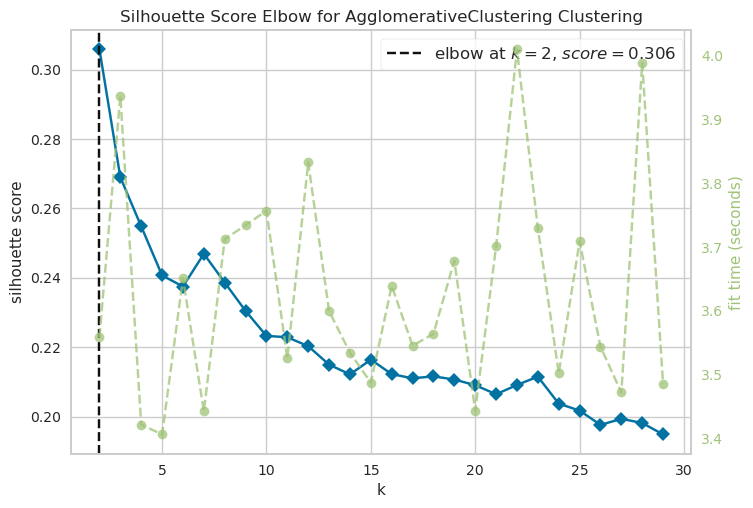

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [69]:
# Silhouette Score 
model_ac = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model_ac, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(scaled_data_cluster)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

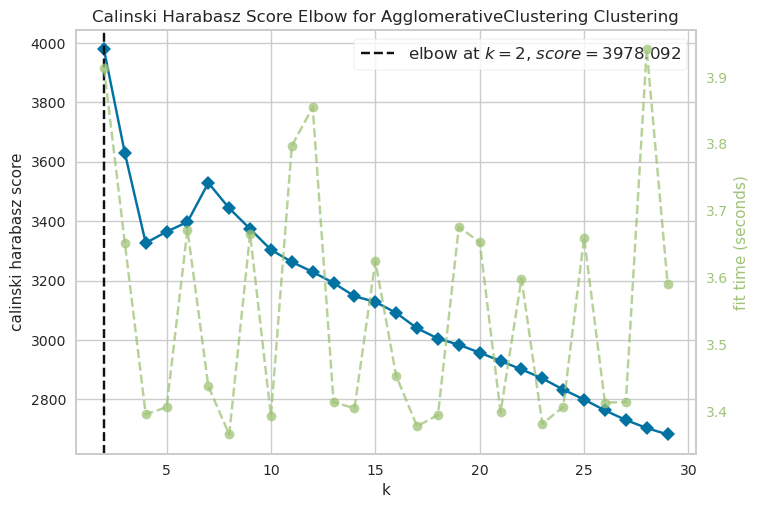

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [70]:
# Calinski Harabasz Score 
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
# k is range of number of clusters.
visualizer = KElbowVisualizer(model_ac, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(scaled_data_cluster)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

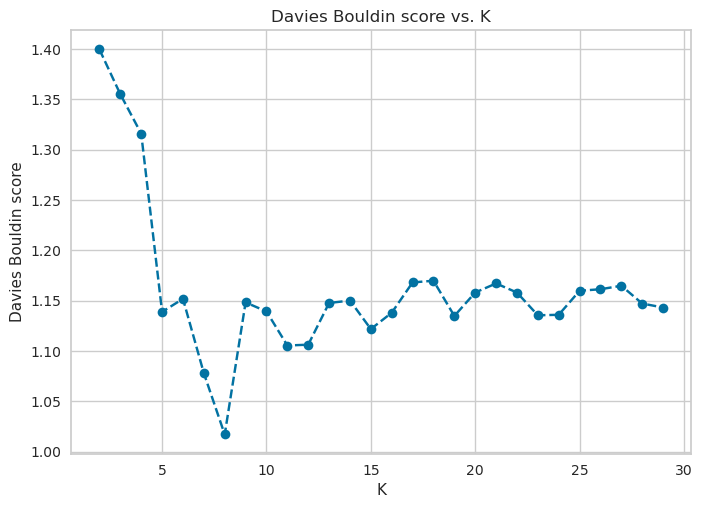

In [75]:
# Davies Bouldin score 
scores = []
k = list(range(2,30))
for i in k:
    model_ac = AgglomerativeClustering(n_clusters=i)
    model_ac.fit_predict(scaled_data_cluster)
    scores.append(metrics.davies_bouldin_score(scaled_data_cluster, model_ac.labels_))
    
plt.plot(k, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

Inference: k=7 minimum Davies Bouldin score

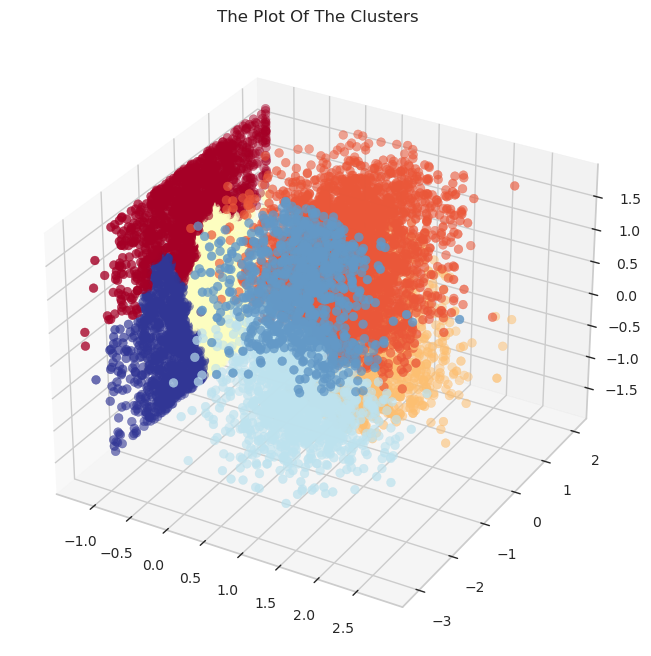

In [102]:
model_ac = AgglomerativeClustering(n_clusters=7)
y_pred_ac=model_ac.fit_predict(scaled_data_cluster)

x =scaled_data_cluster["Balance"]
y =scaled_data_cluster["CreditScore"]
z =scaled_data_cluster["EstimatedSalary"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=y_pred_ac, marker='o', cmap= plt.cm.get_cmap('RdYlBu') )
ax.set_title("The Plot Of The Clusters")
plt.show()

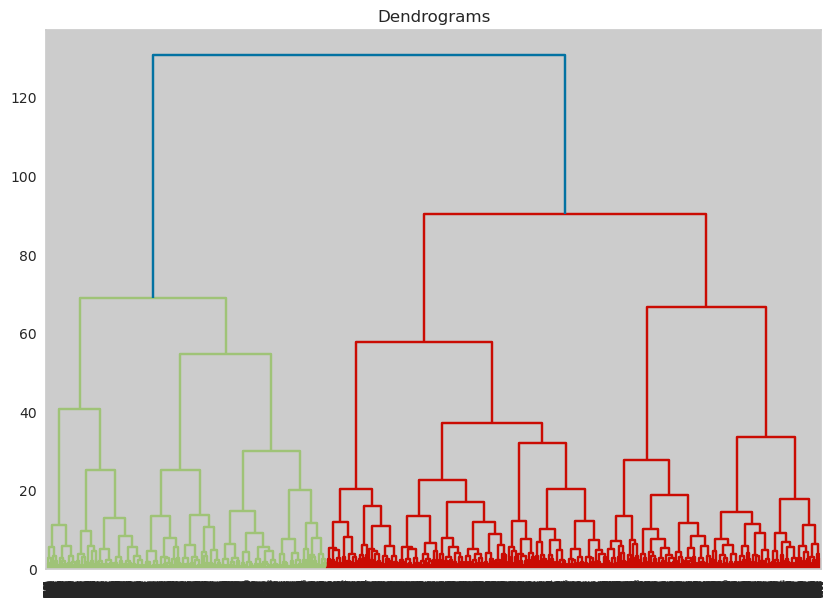

In [80]:
# Dendogram for Heirarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaled_data_cluster, method='ward'))


<a id = "213" ></a>
#### <b> Spectral Clustering</b>
<a id = "SC" ></a>

In [76]:

#SpectralClustering
for k in range(2,10):
    print('k= ',k)
    SC = SpectralClustering(n_clusters=k)
    SC.fit(scaled_data_cluster)
    # fit model and predict clusters
    #yhat_AC = AC.fit_predict(scaled_data_cluster)
    print('Silhouette: ', metrics.silhouette_score(scaled_data_cluster, SC.labels_))
    print('Davies-Bouldin Index: ', metrics.davies_bouldin_score(scaled_data_cluster, SC.labels_))
    print('Calinski-Harabasz Index: ', metrics.calinski_harabasz_score(scaled_data_cluster, SC.labels_))
    print('_______________________________________')



k=  2
Silhouette:  0.3077382991824105
Davies-Bouldin Index:  1.3981285982814406
Calinski-Harabasz Index:  4034.113390913071
_______________________________________
k=  3
Silhouette:  0.29463262461666534
Davies-Bouldin Index:  1.23161009142345
Calinski-Harabasz Index:  4000.2111882381478
_______________________________________
k=  4
Silhouette:  0.277288634388671
Davies-Bouldin Index:  1.1241632377340496
Calinski-Harabasz Index:  3793.931557710514
_______________________________________
k=  5
Silhouette:  0.3062770902800137
Davies-Bouldin Index:  1.0525032821693396
Calinski-Harabasz Index:  4130.195319731853
_______________________________________
k=  6
Silhouette:  0.30230871774681906
Davies-Bouldin Index:  0.9982594568113559
Calinski-Harabasz Index:  4128.207937008562
_______________________________________
k=  7
Silhouette:  0.29963592609065554
Davies-Bouldin Index:  0.991557682896996
Calinski-Harabasz Index:  4334.107950179128
_______________________________________
k=  8
Silhouette

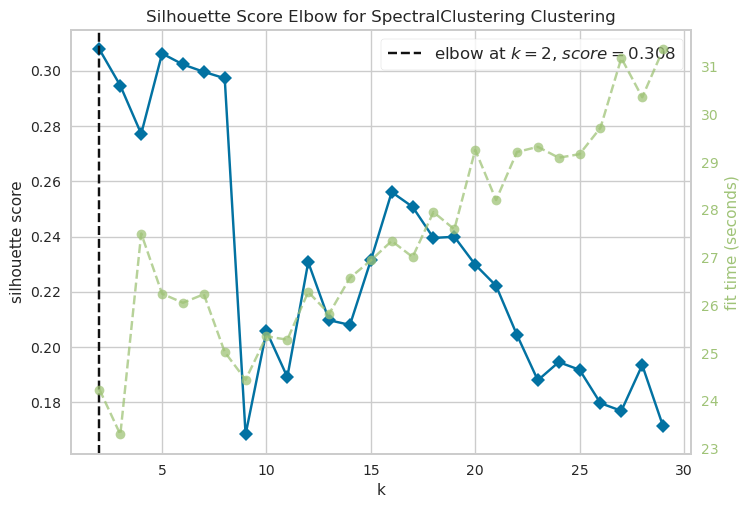

<AxesSubplot:title={'center':'Silhouette Score Elbow for SpectralClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [77]:
# Silhouette Score 
model_sc = SpectralClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model_sc, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(scaled_data_cluster)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

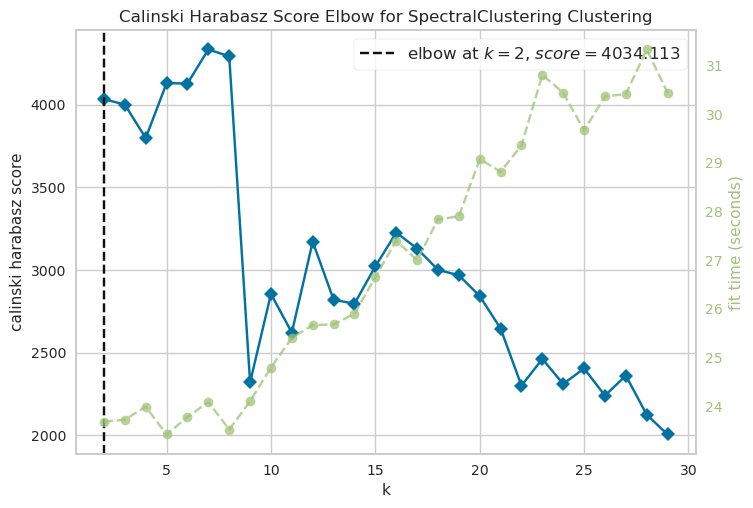

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for SpectralClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [78]:
# Calinski Harabasz Score 
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
# k is range of number of clusters.
visualizer = KElbowVisualizer(model_sc, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(scaled_data_cluster)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

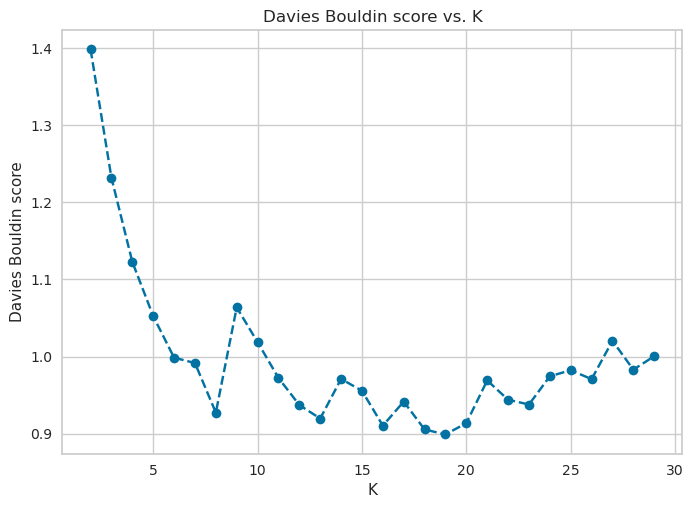

In [79]:
# Davies Bouldin score 
scores = []
k = list(range(2,30))
for i in k:
    model_sc = SpectralClustering(n_clusters=i)
    model_sc.fit_predict(scaled_data_cluster)
    scores.append(metrics.davies_bouldin_score(scaled_data_cluster, model_sc.labels_))
    
plt.plot(k, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

Inference: k=7

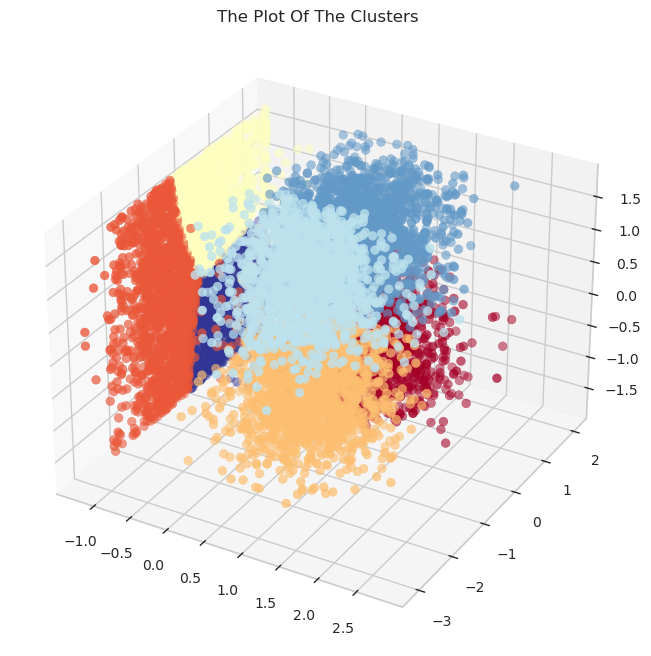

In [108]:

        
model_sc = SpectralClustering(n_clusters=7)
y_pred_sc=model_sc.fit_predict(scaled_data_cluster)

x =scaled_data_cluster["Balance"]
y =scaled_data_cluster["CreditScore"]
z =scaled_data_cluster["EstimatedSalary"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=y_pred_sc, marker='o', cmap= plt.cm.get_cmap('RdYlBu') )
ax.set_title("The Plot Of The Clusters")
plt.show()

Inference:
k=8 minimum Davies Bouldin score 

<a id = "214" ></a>
#### <b> KMeans Clustering</b>
<a id = "KM" ></a>



In [103]:
#Initiating the Agglomerative Clustering model 
for k in range(2,10):
    print('k= ',k)
    KM = KMeans(n_clusters=k)
    KM.fit(scaled_data_cluster)
    # fit model and predict clusters
    #yhat_AC = AC.fit_predict(scaled_data_cluster)
    print('Silhouette: ', metrics.silhouette_score(scaled_data_cluster, KM.labels_))
    print('Davies-Bouldin Index: ', metrics.davies_bouldin_score(scaled_data_cluster, KM.labels_))
    print('Calinski-Harabasz Index: ', metrics.calinski_harabasz_score(scaled_data_cluster, KM.labels_))
    print('_______________________________________')


k=  2
Silhouette:  0.30690035166382973
Davies-Bouldin Index:  1.4060196797737528
Calinski-Harabasz Index:  4045.6207075291322
_______________________________________
k=  3
Silhouette:  0.2951720197614135
Davies-Bouldin Index:  1.224572826285096
Calinski-Harabasz Index:  4008.3109507829568
_______________________________________
k=  4
Silhouette:  0.2833905439582437
Davies-Bouldin Index:  1.0371099737334626
Calinski-Harabasz Index:  3862.1412265721183
_______________________________________
k=  5
Silhouette:  0.3080417834157386
Davies-Bouldin Index:  1.0644991552729504
Calinski-Harabasz Index:  4209.330427743269
_______________________________________
k=  6
Silhouette:  0.312403125531312
Davies-Bouldin Index:  0.9636822497409745
Calinski-Harabasz Index:  4236.634338073661
_______________________________________
k=  7
Silhouette:  0.30672115792094884
Davies-Bouldin Index:  0.9842898610058229
Calinski-Harabasz Index:  4441.76301484665
_______________________________________
k=  8
Silhouet

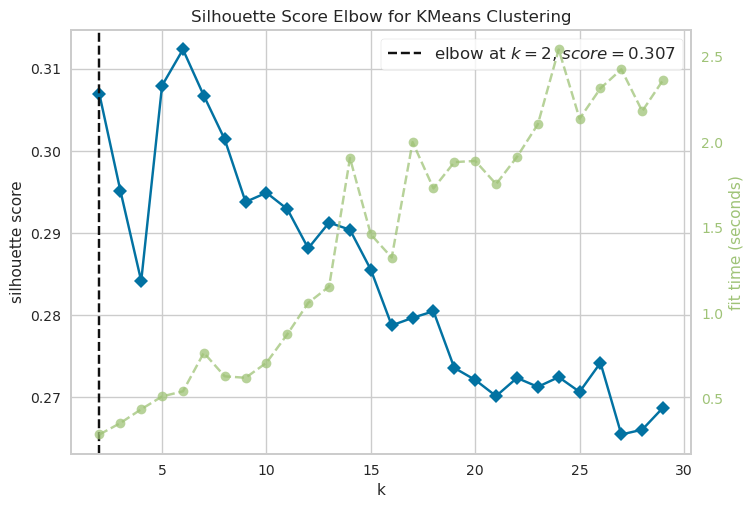

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [104]:
# Silhouette Score 
model_km = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model_km, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(scaled_data_cluster)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

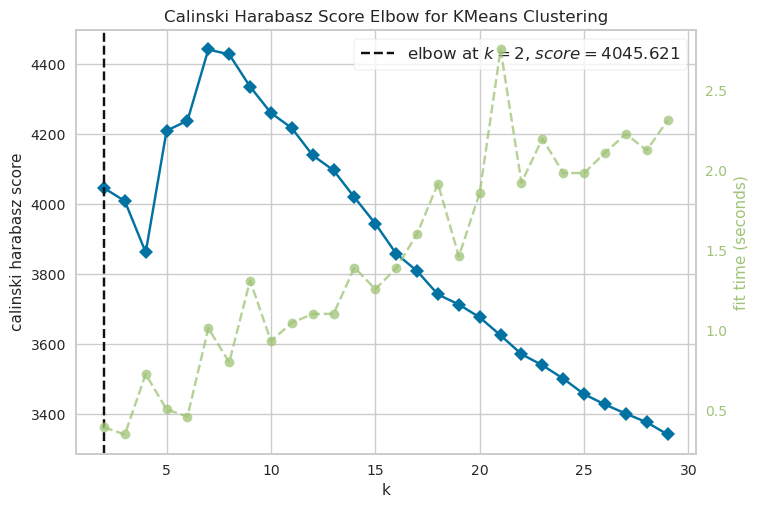

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [105]:
# Calinski Harabasz Score 
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
# k is range of number of clusters.
visualizer = KElbowVisualizer(model_km, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(scaled_data_cluster)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

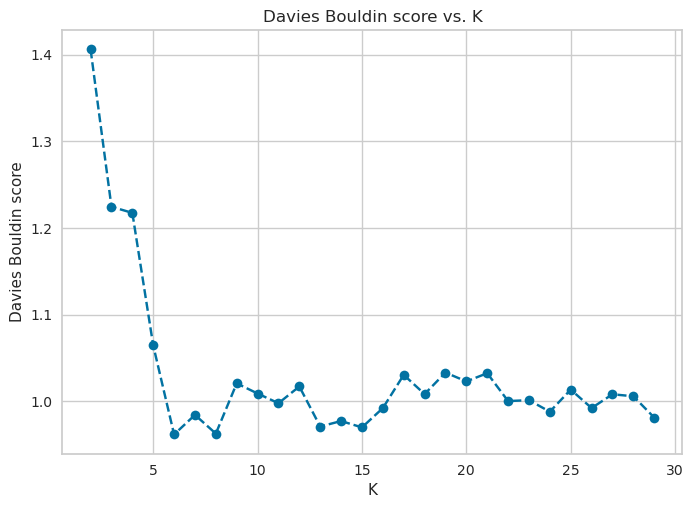

In [106]:
# Davies Bouldin score 
scores = []
k = list(range(2,30))
for i in k:
    model_km = KMeans(n_clusters=i)
    model_km.fit_predict(scaled_data_cluster)
    scores.append(metrics.davies_bouldin_score(scaled_data_cluster, model_km.labels_))
    
plt.plot(k, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

Inference:
k=7

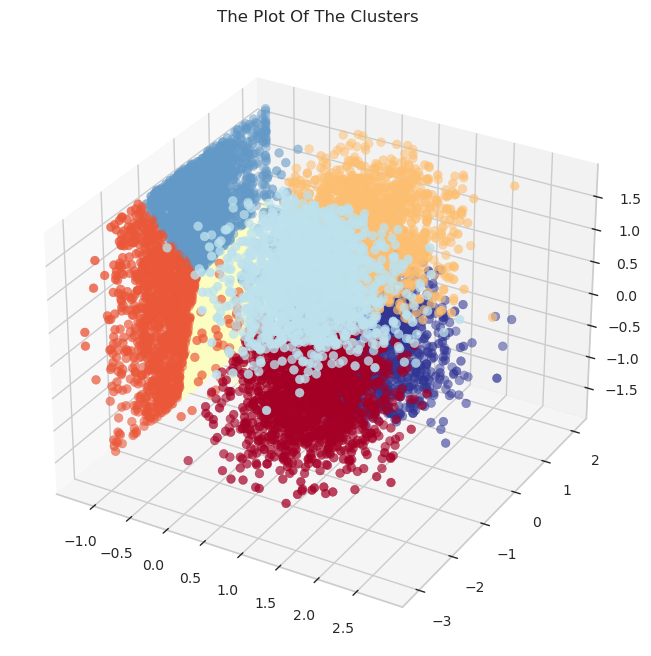

In [107]:
model_sc = KMeans(n_clusters=7)
y_pred_sc=model_sc.fit_predict(scaled_data_cluster)

x =scaled_data_cluster["Balance"]
y =scaled_data_cluster["CreditScore"]
z =scaled_data_cluster["EstimatedSalary"]
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=y_pred_sc, marker='o', cmap= plt.cm.get_cmap('RdYlBu') )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [109]:
algorithms = []
algorithms.append([KMeans(n_clusters=7, random_state=1), 'kmeans'])
algorithms.append([SpectralClustering(n_clusters=7, random_state=1,
                                     affinity='nearest_neighbors'), 'spectral clustering'])
algorithms.append([AgglomerativeClustering(n_clusters=7), 'agglomerative clustering'])

data = []
for algo in algorithms:
    
    print(algo[1])
    algo[0].fit(scaled_data_cluster)
    data.append(({
        'Silhouette': metrics.silhouette_score(scaled_data_cluster, algo[0].labels_),
        'Davies-Bouldin Index': metrics.davies_bouldin_score(scaled_data_cluster, algo[0].labels_),
        'Calinski-Harabasz Index': metrics.calinski_harabasz_score(scaled_data_cluster, algo[0].labels_),

        }))

results = pd.DataFrame(data=data, columns=['Silhouette','Davies-Bouldin Index', 'Calinski-Harabasz Index' ],
                       index=['K-means', 'Spectral', 'Agglomerative'])

results

kmeans
spectral clustering
agglomerative clustering


,Silhouette,Davies-Bouldin Index,Calinski-Harabasz Index
K-means,0.306739,0.983999,4441.678658
Spectral,0.286795,0.955399,3788.403226
Agglomerative,0.246930,1.077935,3528.973179


<a id = "215" ></a>
#### <b> Best XGB using Clusters</b>
<a id = "xgb_clusters" ></a>

In [110]:
#Final model for clustering 
final_sc = SpectralClustering(n_clusters=7, random_state=1, affinity='nearest_neighbors')
y_pred_sc = final_sc.fit_predict(scaled_data_cluster)
#Adding the Clusters feature to the orignal dataframe.
train_data["Clusters"]= y_pred_sc

In [111]:
train_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Clusters
0,619,2,1,42,2,0.00,1,1,1,101348.88,4
1,608,0,1,41,1,83807.86,1,0,1,112542.58,1
2,502,2,1,42,8,159660.80,3,1,0,113931.57,1
3,699,2,1,39,1,0.00,2,0,0,93826.63,0
4,850,0,1,43,2,125510.82,1,1,1,79084.10,6


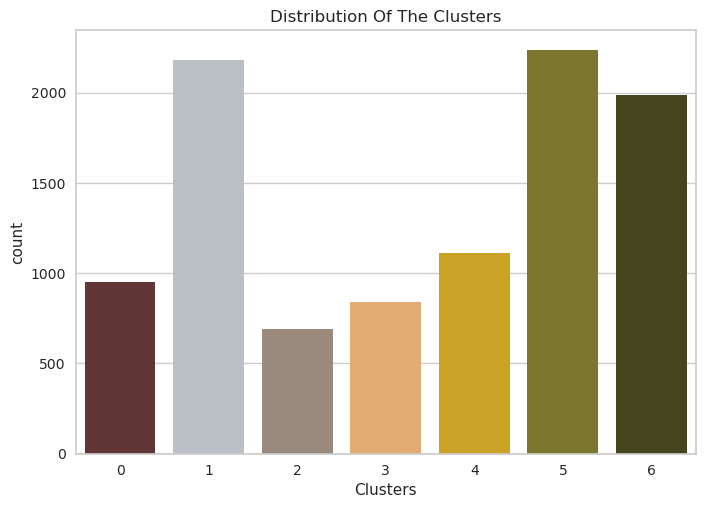

In [116]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60", '#E7B10A', '#898121', '#4C4B16']
ax = sns.countplot(x=train_data["Clusters"], palette= pal)
ax.set_title("Distribution Of The Clusters")
plt.show()

Inference:
Clusters are not evenly distributed. The smallest cluster 2 consists less then 800 customers. The biggest clusters are 1 and 5, they consist of more than 2000 customers.

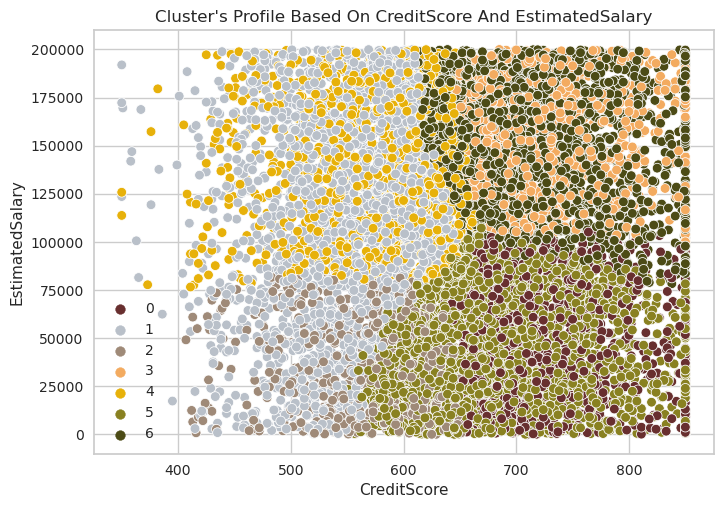

In [119]:
ax = sns.scatterplot(x=train_data["CreditScore"], y=train_data["EstimatedSalary"],hue=train_data["Clusters"], palette= pal)
ax.set_title("Cluster's Profile Based On CreditScore And EstimatedSalary")
plt.legend()
plt.show()

Inference:
Credit Score vs Estimated Salary plot shows the clusters pattern

* group 0: credit score>600 & estimated salary<100000
* group 1: credit score<600 & estimated salary<2100000
* group 2: credit score<650 & estimated salary<75000
* group 3: credit score>650 & estimated salary>100000
* group 4: credit score<650 & estimated salary>75000
* group 5: credit score>550 & estimated salary<100000
* group 6: credit score>600 & estimated salary>100000

The groups are overlapping by using only 2 parameters: Credit Score vs Estimated Salary

<AxesSubplot:xlabel='Clusters', ylabel='EstimatedSalary'>

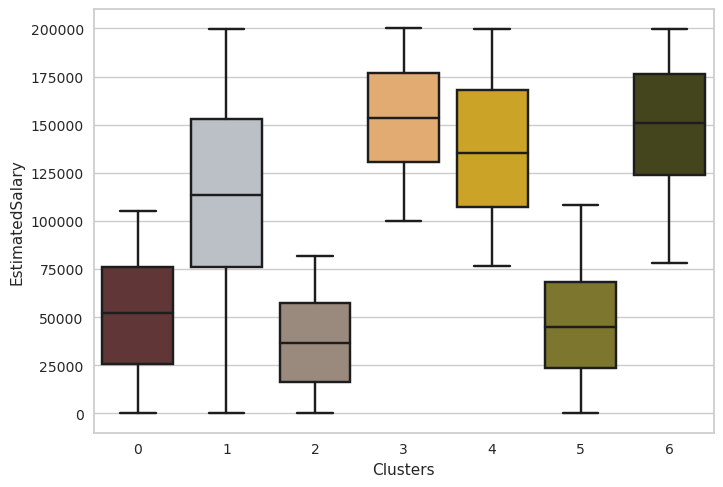

In [120]:
sns.boxplot(x=train_data["Clusters"], y=train_data["EstimatedSalary"], palette=pal)

Inference:
* group 0: median of Estimated Salary near 50000
* group 1: median of Estimated Salary near 115000
* group 2: median of Estimated Salary near 37000
* group 3: median of Estimated Salary near 150000
* group 4: median of Estimated Salary near 130000
* group 5: median of Estimated Salary near 45000
* group 6: median of Estimated Salary near 150000






<AxesSubplot:xlabel='Clusters', ylabel='count'>

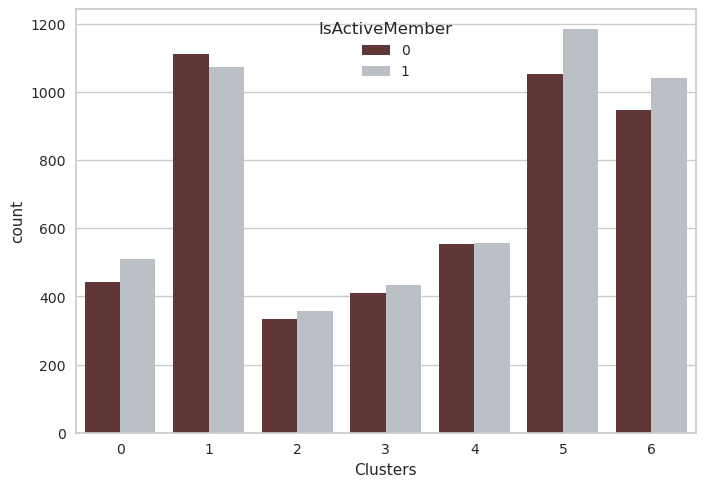

In [121]:
sns.countplot(x=train_data["Clusters"], hue=train_data['IsActiveMember'], palette=pal)

Inference:
* #active_members is more then #non_active_members in groups: 4,5,6
* #active_members is less then #non_active_members in groups: 0,1,2,3
* 
* The distribution of active/non_active customers is almost the same in each group.

<AxesSubplot:xlabel='Clusters', ylabel='count'>

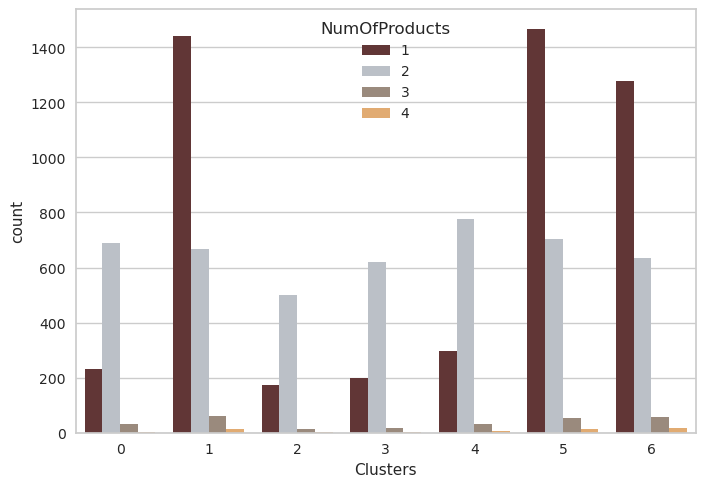

In [122]:
sns.countplot(x=train_data["Clusters"], hue=train_data['NumOfProducts'], palette=pal)

Inference:
* the vast majority of customers in groups 0,2,3,4 have 2 products on average
* the vast majority of customers in group 1,5,6 have 1 product on average

<AxesSubplot:xlabel='Clusters', ylabel='count'>

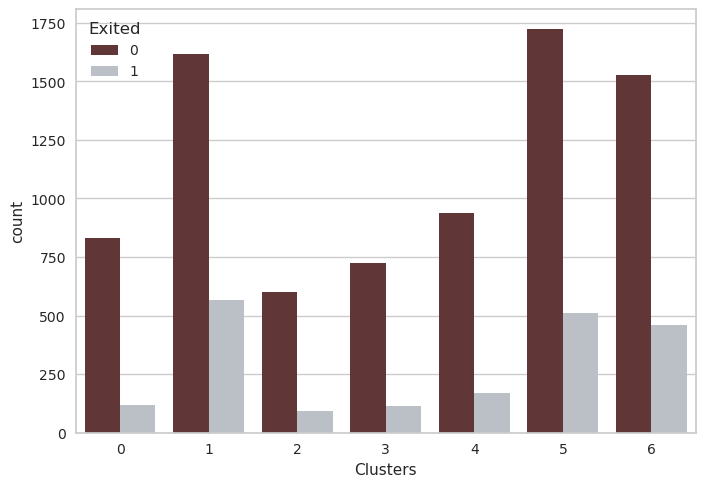

In [124]:
sns.countplot(x=train_data["Clusters"], hue=Y, palette=pal)

Inference:
Most of the customers who churned are from groups 1,5 and 6

In [125]:
#highly imbalanced data need to use stratify for target

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(train_data, Y, test_size=0.3, random_state=42, stratify=Y)

train accuracy-score: 0.8067142857142857
test accuracy-score: 0.8023333333333333


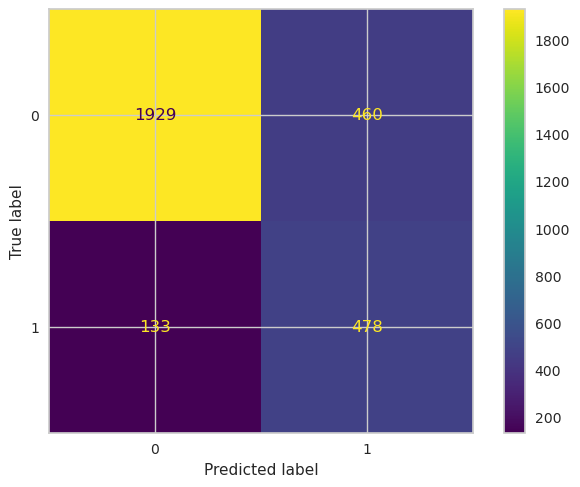

roc_auc score:  0.7948874375804544
pr_auc score:  0.6681261374911739
Precision: 0.510
Recall: 0.782
F1 Score: 0.617
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      2389
           1       0.51      0.78      0.62       611

    accuracy                           0.80      3000
   macro avg       0.72      0.79      0.74      3000
weighted avg       0.85      0.80      0.82      3000

Accuracy Score: 0.802


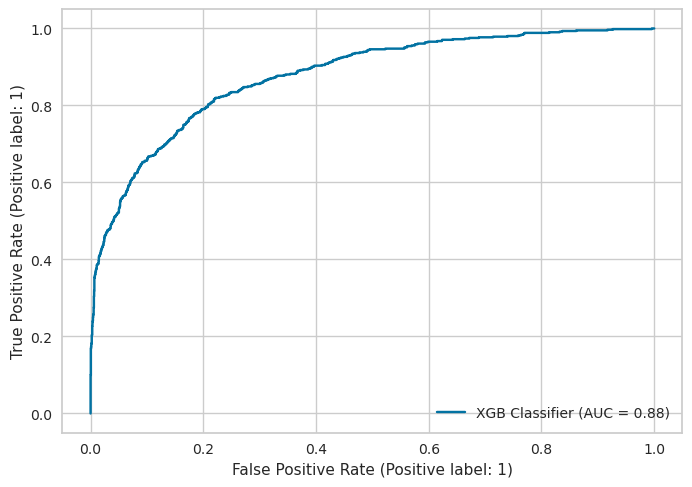

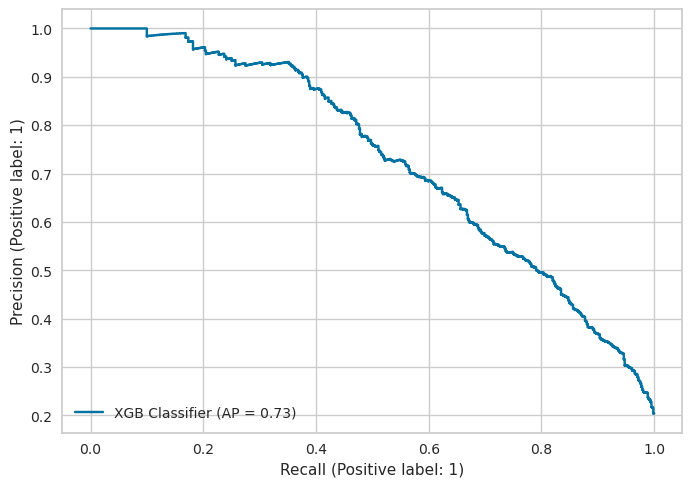

In [130]:
# set parameter range for randomized search
parameters={ 
            "learning_rate"     : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
             "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
             "min_child_weight" : [ 1, 3, 5, 7 ],
             "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
             "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
             'n_estimators'     : [100, 200, 500, 1000],
             'random_state'     :[42],
            'scale_pos_weight'  :[3.9] # because training data is extremely unbalanced 
             
           }

kfold = KFold(n_splits=10, random_state=42, shuffle=True)
xgb_model=RandomizedSearchCV(XGBClassifier(tree_method='gpu_hist'), param_distributions=parameters, cv=kfold, n_iter=150,scoring=recall_scorer)
xgb_model.fit(x_train_2, y_train_2) 

y_train_pred = xgb_model.predict(x_train_2) 
y_test_pred = xgb_model.predict(x_test_2) 

#Print the F1 score for train and test sets
print(f"train accuracy-score: {accuracy_score(y_train_2, y_train_pred)}") 
print(f"test accuracy-score: {accuracy_score(y_test_2, y_test_pred)}")

ConfusionMatrixDisplay.from_predictions(y_test_2, y_test_pred)
plt.show()


false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_2, y_test_pred)
precision, recall, _ = precision_recall_curve(y_test_2, y_test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
pr_auc_score = auc(recall, precision)
print("roc_auc score: ",roc_auc)
print('pr_auc score: ', pr_auc_score)
print('Precision: %.3f' % precision_score(y_test_2, y_test_pred))
print('Recall: %.3f' % recall_score(y_test_2, y_test_pred))
print('F1 Score: %.3f' % f1_score(y_test_2, y_test_pred))
print(classification_report(y_test_2, y_test_pred))
print("Accuracy Score: %.3f" % accuracy_score(y_test_2, y_test_pred))
#list_of_parameters.append(['Imbalanced data','XGB Classifier', roc_auc, pr_auc_score, precision_score(y_test, y_test_pred),recall_score(y_test, y_test_pred),f1_score(y_test, y_test_pred),accuracy_score(y_test, y_test_pred)])
plot_roc_curve(xgb_model, x_test_2, y_test_2, name = "XGB Classifier")
plot_precision_recall_curve(xgb_model, x_test_2, y_test_2, name = "XGB Classifier")


Inference:
As we can see, user segmentation helped to improve the model performance.